<h1 align="center">MILESTONE 1 CHURN RATE</h1>
<center><i>Devan Setya Putra<i></center>
<center><i>HCK 004 Phase 2<i></center>
    

----

# 📝 Problem


> Di setiap bisnis, terdapat berbagai macam tantangan. Salah satu tantangan yang paling sering dihadapi oleh pebisnis adalah bagaimana agar customer akan datang kembali untuk membeli produk. Oleh sebab itu, dalam analisis ini akan memprediksi apa yang berpengaruh terhadap customer balik lagi atau tidak?

----

# 📁 File Descriptions
> Data yang diperoleh dari database adalah data churn, yang mana berisi berbagai hal mengenai identitas customer dan clasisfikasi apakah mereka akan churn atau tidak.

`Churn rate adalah kemungkinan customer akan kembali lagi atau tidak`


----

# ❓ Variables



> user_id: ID pelanggan

> age: Usia pelanggan

> gender: Jenis kelamin pelanggan

> region_category: Daerah tempat tinggal pelanggan

> membership_category: Kategori keanggotaan yang dimiliki pelanggan

> joining_date: Tanggal bergabungnya pelanggan menjadi anggota

> joined_through_referral: Apakah pelanggan bergabung melalui kode atau ID referral

> preferred_offer_types: Jenis penawaran yang disukai oleh pelanggan

> medium_of_operation: Media transaksi yang digunakan oleh pelanggan

> internet_option: Jenis layanan internet yang digunakan oleh pelanggan

> last_visit_time: Waktu kunjungan terakhir pelanggan ke situs web

> days_since_last_login: Jumlah hari sejak pelanggan terakhir kali masuk ke situs web

> avg_time_spent: Rata-rata waktu yang dihabiskan oleh pelanggan di situs web

> avg_transaction_value: Nilai transaksi rata-rata yang dilakukan oleh pelanggan

> avg_frequency_login_days: Jumlah kali pelanggan telah masuk ke situs web

> points_in_wallet: Poin yang diberikan kepada pelanggan pada setiap transaksi

> used_special_discount: Apakah pelanggan menggunakan diskon khusus yang ditawarkan

> offer_application_preference: Apakah pelanggan lebih memilih untuk menerima tawaran

> past_complaint: Apakah pelanggan pernah mengajukan keluhan

> complaint_status: Apakah keluhan yang diajukan oleh pelanggan telah diselesaikan

> feedback: Masukan yang diberikan oleh pelanggan

> churn_risk_score: Skor risiko churn, di mana 
  - 0 -> artinya pelanggan tidak akan churn (berhenti berlangganan)
  - 1 -> artinya pelanggan mungkin akan churn.

----

# 🎯 Goals

>Tujuan dari analisis ini adalah untuk menklasifikasikan mana yang akan churn dan mana yang tidak, serta mengetahui tipe customer seperti apa yang akan churn dan seperti apa yang tidak.

---
# 📚 Library

-----


In [1]:
!pip install phik
!pip install feature_engine
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#korelasi
import phik

#multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

#pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import shapiro
import scipy.stats as stats

#modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix

#saving
import joblib
import pickle

# Display
pd.options.display.max_columns = None

# import warnings
# warnings.filterwarnings(action='ignore')

----
# 📊 Loading Data
----

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
# read CSV untuk memanggil data csv, dan missing value untuk memastikan bahwa tidak ada lagi uniq missing value
missing_values = ["n/a", "na", "--",' ?', 'inf']
data=pd.read_csv("churn.csv", na_values = missing_values, skipinitialspace=True)
df= data.copy()
df.head(10) #melihat 10 data pertama

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [6]:
# Melihat 10 nilai terakhir
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [7]:
# untuk melihat info apakah masih ada data string atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

----
# 🧹Cleaning Data

---

In [8]:
# untuk melihat apakah masih ada data missing value pada dataframe
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

joined_through_referral         14.704134
region_category                 14.674412
medium_of_operation             14.577141
preferred_offer_types            0.778168
gender                           0.159416
user_id                          0.000000
avg_frequency_login_days         0.000000
feedback                         0.000000
complaint_status                 0.000000
past_complaint                   0.000000
offer_application_preference     0.000000
used_special_discount            0.000000
points_in_wallet                 0.000000
days_since_last_login            0.000000
avg_transaction_value            0.000000
avg_time_spent                   0.000000
age                              0.000000
last_visit_time                  0.000000
internet_option                  0.000000
joining_date                     0.000000
membership_category              0.000000
churn_risk_score                 0.000000
dtype: float64

---
> Dari nilai missing value diatas terdapat 3 kolom yang memiliki missing value yang sangat besar (mencapat 14.70%). hal ini perlu dilakukan penangan.
---

In [10]:
df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0], inplace=True)
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0], inplace=True)

---
> Karena ada 3 kolom yang memiliki jumlah missing value lebih dari 14%, maka missing value dari ketiga kolom tersebut akan diisi atau diganti dengan nilai modus dari masing-masing kolom.
---

In [11]:
df.dropna(inplace=True)

In [12]:
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

user_id                         0.0
age                             0.0
feedback                        0.0
complaint_status                0.0
past_complaint                  0.0
offer_application_preference    0.0
used_special_discount           0.0
points_in_wallet                0.0
avg_frequency_login_days        0.0
avg_transaction_value           0.0
avg_time_spent                  0.0
days_since_last_login           0.0
last_visit_time                 0.0
internet_option                 0.0
medium_of_operation             0.0
preferred_offer_types           0.0
joined_through_referral         0.0
joining_date                    0.0
membership_category             0.0
region_category                 0.0
gender                          0.0
churn_risk_score                0.0
dtype: float64

---
> Untuk kolom yang memiliki missing value kurang dari 1% akan di drop baris, dan untuk missing value sudah ditangani semua.
---

In [13]:
df.duplicated().sum()

18

In [14]:
# untuk melihat apakah terdapat data duplicate  (Tidak ada Duplicate data)
df[df.duplicated(keep=False)] 

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1035,854f5d6d5d9204d3,55,F,Town,Premium Membership,2015-08-07,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,12:07:52,8,1465.940000,73063.54,18.0,838.900000,Yes,Yes,No,Not Applicable,User Friendly Website,0
1546,9f97903015fd0580,29,M,Town,Silver Membership,2017-10-31,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,12:47:12,16,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
3321,9f97903015fd0580,29,M,Town,Silver Membership,2017-10-31,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,12:47:12,16,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
7062,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,18:16:03,8,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
7547,b36a10c24eab4cb0,44,M,Town,Silver Membership,2016-06-29,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,19:17:31,10,805.150000,45635.76,24.0,701.860000,No,Yes,Yes,No Information Available,Poor Customer Service,0
8807,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,17:05:33,18,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
9092,9d20f093164c98a3,35,M,Town,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,17:58:45,4,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0
9248,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,17:33:22,-999,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,18:16:03,8,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
9856,b1074e2baf6845ce,17,M,City,Platinum Membership,2015-09-06,No,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,01:36:55,25,40.950000,8759.38,29.0,713.060000,No,Yes,Yes,Unsolved,Poor Customer Service,0


---
> Output diatas menjelaskan tentang apakah terdapat data duplikat atau tidak, dan ternyata terdapat 18 data yang memiliki duplikat.
---

In [15]:
df.drop_duplicates(inplace=True)

---
> Untuk penangan data yang memiliki duplikat, maka akan dilakukan drop duplikat dalam penanganannya.
---

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36646 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36646 non-null  object 
 1   age                           36646 non-null  int64  
 2   gender                        36646 non-null  object 
 3   region_category               36646 non-null  object 
 4   membership_category           36646 non-null  object 
 5   joining_date                  36646 non-null  object 
 6   joined_through_referral       36646 non-null  object 
 7   preferred_offer_types         36646 non-null  object 
 8   medium_of_operation           36646 non-null  object 
 9   internet_option               36646 non-null  object 
 10  last_visit_time               36646 non-null  object 
 11  days_since_last_login         36646 non-null  int64  
 12  avg_time_spent                36646 non-null  float64
 13  a

---
> output diatas menjelaskan mengenai info dari setiap kolom, yang mana terdapat `4 kolom float, 3 data integer dan 15 data object`. namun sebelum dilakukan analisis, perlu dipastikan lagi apakah kolom tersebut sudah sesuai dengan tipenya atau belum.
---

In [17]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36646.000000,36646.000000,36646.000000,36646.000000,36646.000000,36646.000000,36646.000000
mean,37.115511,-41.955957,279.118857,29276.226579,14.655780,623.646095,0.541041
std,15.871279,228.913891,329.850217,19448.891993,9.471645,270.163457,0.498320
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.087500,14177.835000,7.000000,574.212500,0.000000
50%,37.000000,12.000000,161.770000,27563.715000,14.000000,680.415000,1.000000
75%,51.000000,16.000000,356.352500,40860.437500,22.000000,757.037500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


In [18]:
median = df['days_since_last_login'].median()
df.loc[df['days_since_last_login'] < 0, 'days_since_last_login'] = median

---
> Jika diperhatikan, output diatas merupakan deskripsi dari kolom numeric.

> Jika diamati, pada kolom `days_since_last_login`, terdapat nilai minimum yang tidak wajar dan kemungkinan ada terjadi kesalahan input. Oleh karena itu, data perlu ditangani.

> penangan pada data tersebut adalah akan diganti untuk days kurang dari 0 akan diganti dengan nilai `median`.

    `Untuk nilai dibawah 0 hanya ada nilai -999`
---

In [19]:
df.describe(include='object')

,user_id,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36646,36646,36646,36646,36646,36646,36646,36646,36646,36646,36646,36646,36646,36646,36646
unique,36646,2,3,6,1096,2,3,3,3,29876,2,2,2,5,9
top,9f420209e7d129f3,F,Town,Basic Membership,2015-06-02,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,18348,19367,7648,55,21093,12322,19120,12290,6,20153,20247,18418,18418,6294


---
> Jika diperhatikan, output diatas merupakan deskripsi dari kolom object.

> Jika diamati, pada kolom `joining_date` dan `last_visit_time` merupakan data waktu, sehingga perlu diubah type datanya menjadi waktu.
---

In [20]:
# Mengubah bentuk data menjadi Datetime untuk kolom date
df['joining_date']=pd.to_datetime(df['joining_date'])
df['last_visit_time']=pd.to_datetime(df['last_visit_time'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36646 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36646 non-null  object        
 1   age                           36646 non-null  int64         
 2   gender                        36646 non-null  object        
 3   region_category               36646 non-null  object        
 4   membership_category           36646 non-null  object        
 5   joining_date                  36646 non-null  datetime64[ns]
 6   joined_through_referral       36646 non-null  object        
 7   preferred_offer_types         36646 non-null  object        
 8   medium_of_operation           36646 non-null  object        
 9   internet_option               36646 non-null  object        
 10  last_visit_time               36646 non-null  datetime64[ns]
 11  days_since_last_login       

In [22]:
df.describe(include='datetime64[ns]')

<ipython-input-22-a647f831ef1a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime64[ns]')
<ipython-input-22-a647f831ef1a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime64[ns]')


,joining_date,last_visit_time
count,36646,36646
unique,1096,29876
top,2015-06-02 00:00:00,2023-03-31 07:56:41
freq,55,6
first,2015-01-01 00:00:00,2023-03-31 00:00:00
last,2017-12-31 00:00:00,2023-03-31 23:59:59


---
> diatas merupakan proses mengubah type data object menjadi waktu
---

----

# 🔍 Exploratory Analysis

----

In [23]:
# sedangkan ini untuk melihat berapa jumlah uniq value ditiap kolom
for i in df.columns:
  print('total variation {} as much {}'.format(i,df[i].nunique()))

total variation user_id as much 36646
total variation age as much 55
total variation gender as much 2
total variation region_category as much 3
total variation membership_category as much 6
total variation joining_date as much 1096
total variation joined_through_referral as much 2
total variation preferred_offer_types as much 3
total variation medium_of_operation as much 3
total variation internet_option as much 3
total variation last_visit_time as much 29876
total variation days_since_last_login as much 26
total variation avg_time_spent as much 24056
total variation avg_transaction_value as much 36551
total variation avg_frequency_login_days as much 955
total variation points_in_wallet as much 23407
total variation used_special_discount as much 2
total variation offer_application_preference as much 2
total variation past_complaint as much 2
total variation complaint_status as much 5
total variation feedback as much 9
total variation churn_risk_score as much 2


In [24]:
# sedangkan ini untuk melihat kolom apa saja yang uniq valuenya dibawah 15
for i in df.columns:
  if len(df[i].unique()) < 15 :
    print(df[i].name)
    print(df[i].unique())
  else:
    continue

gender
['F' 'M']
region_category
['Town' 'City' 'Village']
membership_category
['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']
joined_through_referral
['Yes' 'No']
preferred_offer_types
['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons']
medium_of_operation
['Desktop' 'Smartphone' 'Both']
internet_option
['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']
used_special_discount
['Yes' 'No']
offer_application_preference
['Yes' 'No']
past_complaint
['Yes' 'No']
complaint_status
['No Information Available' 'Not Applicable' 'Unsolved' 'Solved'
 'Solved in Follow-up']
feedback
['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']
churn_risk_score
[1 0]


---
> diatas merupakan output dari unique values setiap kolom, jika diperhatikan untuk kolom yang memiliki Unique Value kurang dari 15 akan dianggap sebagai `Kategori` sedangkan untuk diatasnya bukan kategori.

---

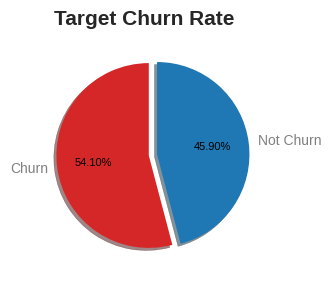

In [25]:
values = df.churn_risk_score.value_counts()
labels = ['Churn', 'Not Churn']
colors = ['tab:red', 'tab:blue'] # specify the colors you want to use

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
fig.suptitle('Target Churn Rate', fontsize=15, fontweight='bold')
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode, colors=colors) # add the colors parameter

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

---
> Masuk pada analisis column, diatas merupakan pie plot target yaitu churn_risk_score. dapat dilihat bahwa data tidak terlalu jauh, namun lebih banyak yang churn dibandingkan dengan yang tidak dalam data ini.

---

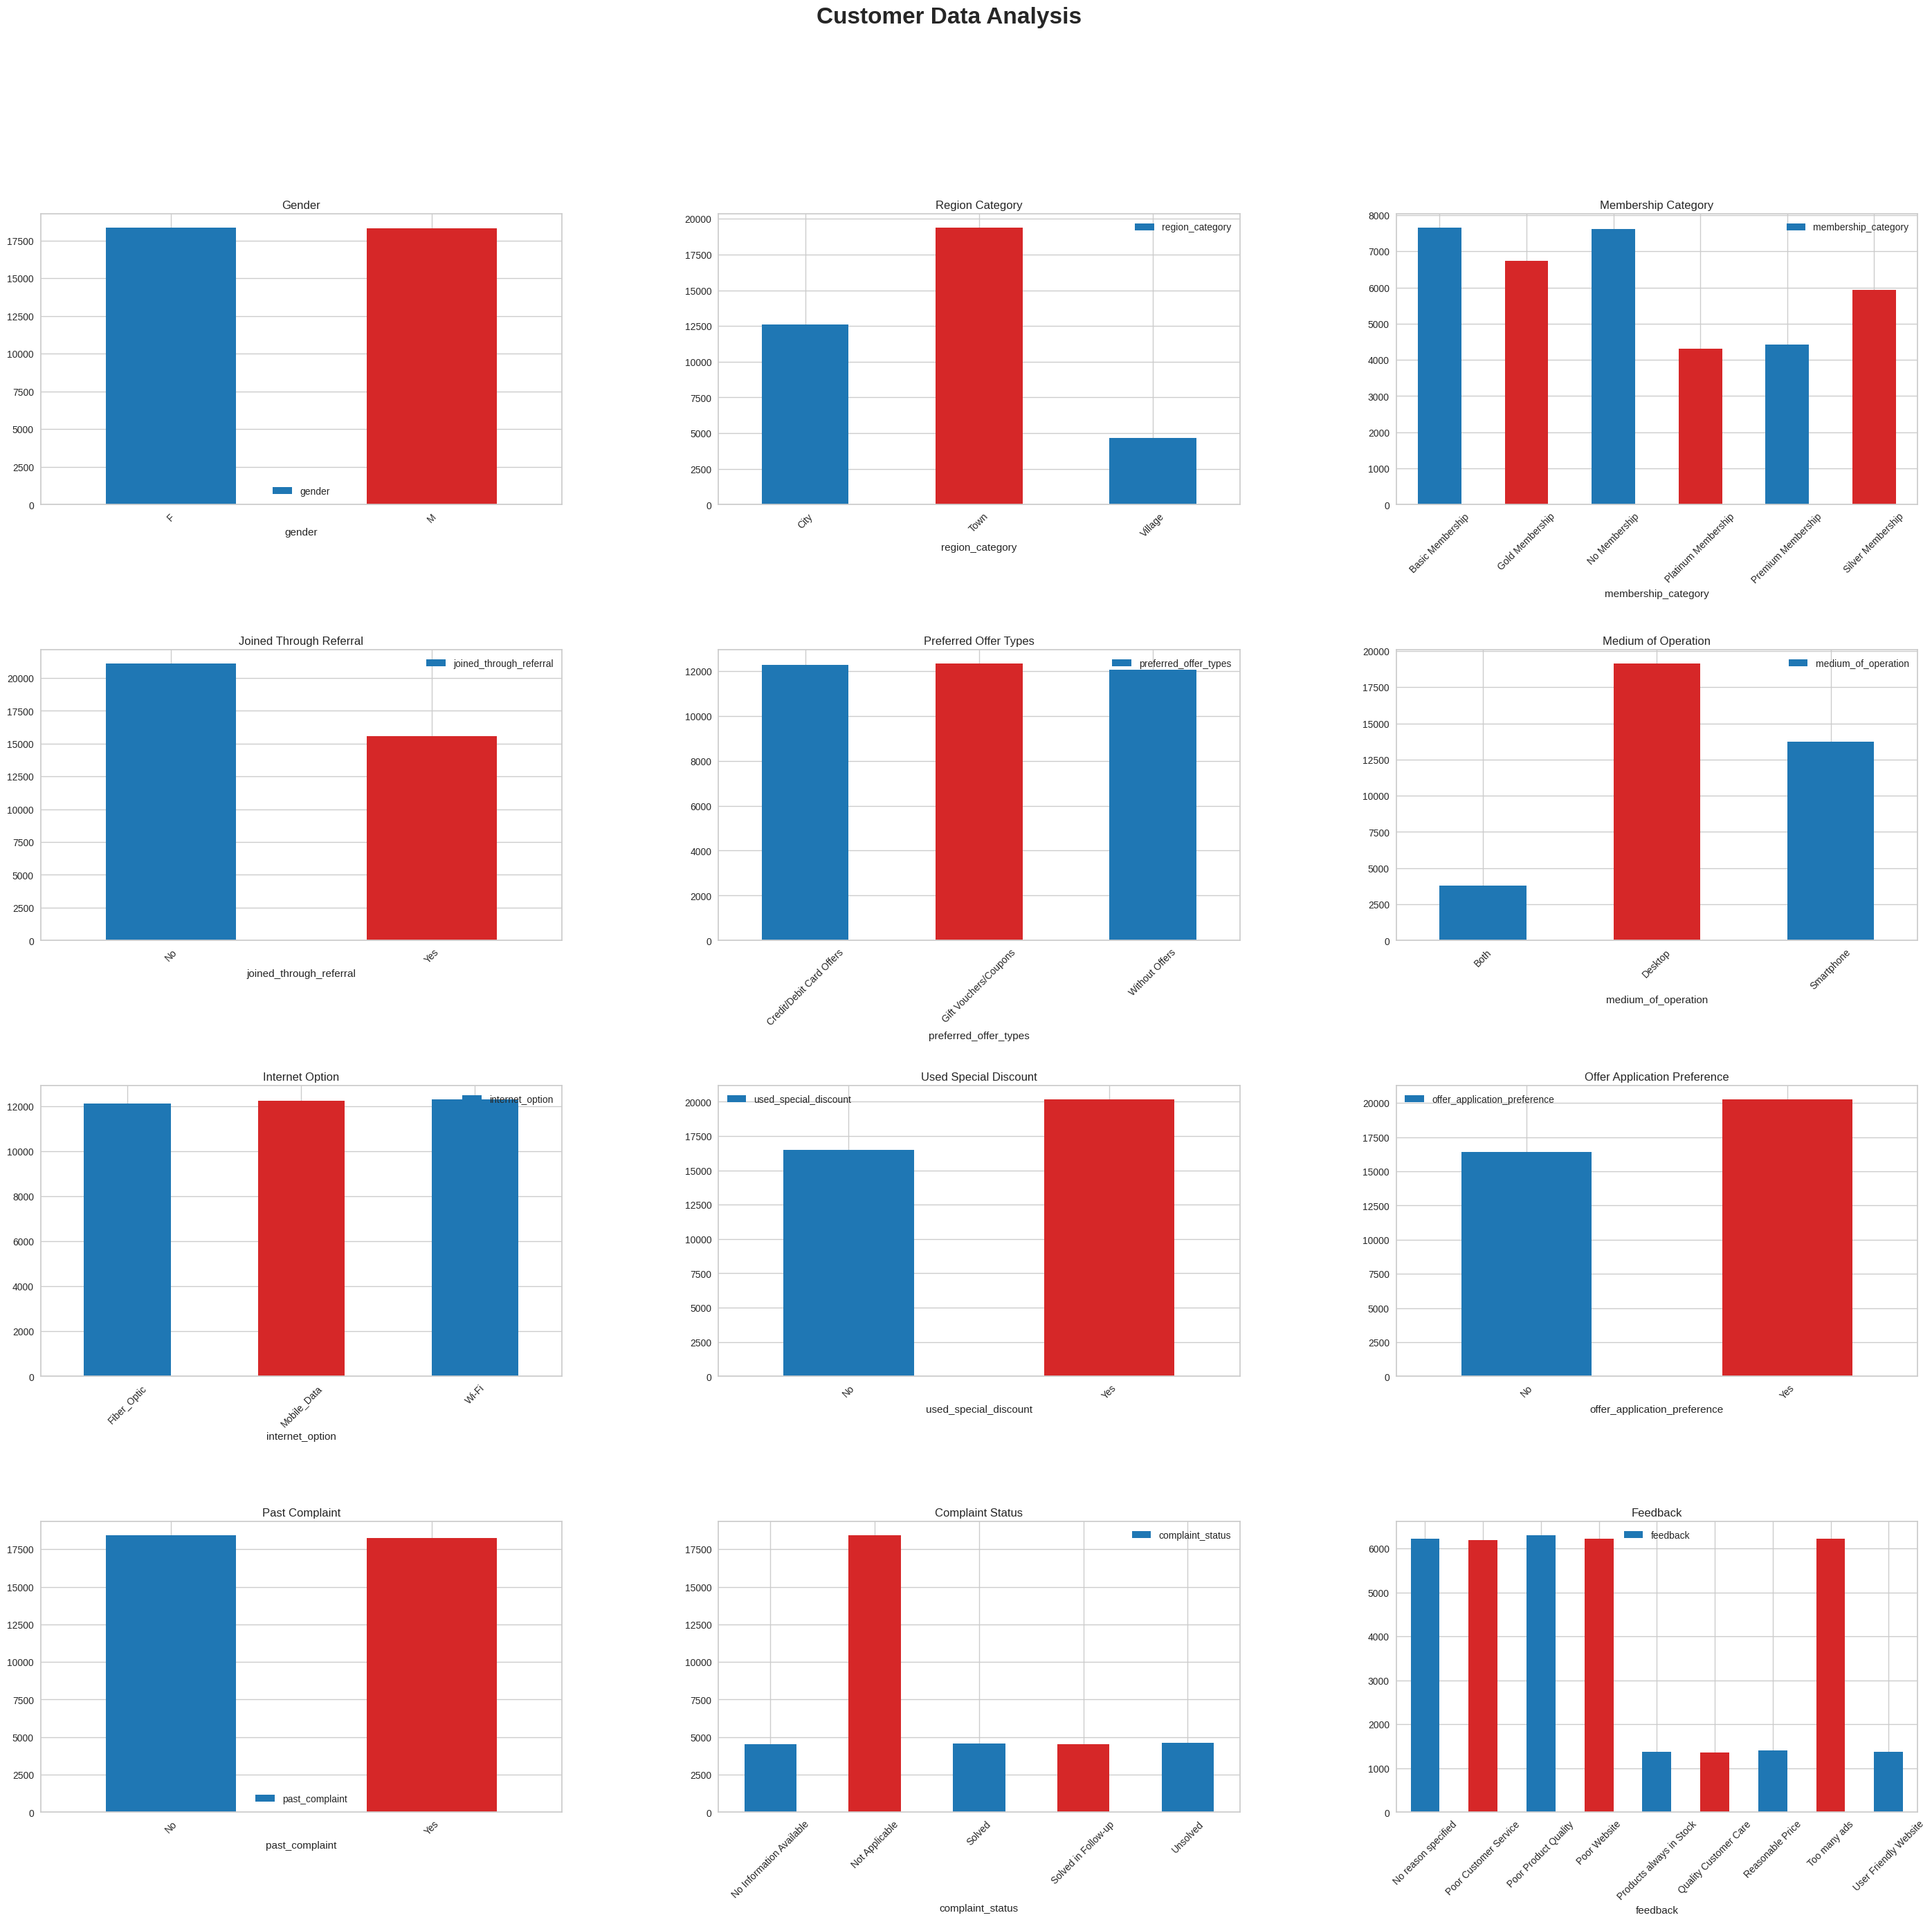

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(35, 30))
fig.suptitle('Customer Data Analysis', fontsize=24, fontweight='bold')

chart_data = [    
    {'groupby': 'gender', 'labels': ['Female', 'Male'], 'title': 'Gender'},
    {'groupby': 'region_category',  'title': 'Region Category'},
    {'groupby': 'membership_category',   'title': 'Membership Category'},
    {'groupby': 'joined_through_referral', 'title': 'Joined Through Referral'},
    {'groupby': 'preferred_offer_types',  'title': 'Preferred Offer Types'},
    {'groupby': 'medium_of_operation',  'title': 'Medium of Operation'},
    {'groupby': 'internet_option',  'title': 'Internet Option'},
    {'groupby': 'used_special_discount',  'title': 'Used Special Discount'},
    {'groupby': 'offer_application_preference',  'title': 'Offer Application Preference'},
    {'groupby': 'past_complaint',  'title': 'Past Complaint'},
    {'groupby': 'complaint_status', 'title': 'Complaint Status'},
    {'groupby': 'feedback',  'title': 'Feedback'}
]

colors = ['tab:blue', 'tab:red']

for i, chart in enumerate(chart_data):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    df.groupby(chart['groupby'])[chart['groupby']].count().plot(kind='bar', x=chart['groupby'], y='count', ax=ax, color=colors)
    # ax.set_xticklabels(chart['labels'])
    ax.legend()
    ax.set_title(chart['title'])
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=45)

fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


---
`Output diatas merupakan bentuk data dari masing-masing kolom category`
> Gender= Dari kolom gender dapat dilihat bahwa jumlah laki-laki dan perempuan tidak berbeda jauh.

> region_category = Diperhatikan dari data diatas, customer paling banyak yang berasal dari `Town` dan paling sedikit dari `Village`.

> membership_category = Dari kolom ini terdapat 6 class member, dan jenis terbanyak adalah yang `bukan member` dan `basic member`. namun untuk yang paling sedikit adalah `platinum member`

> joined_through_referral= Dalam hal menjadi bagian dari kategori member, terdapat 2 cara saat masuk yaitu dengan referral atau tidak. dalam data ini lebih banyak customer yang masuk tidak menggunakan `referral`

> preferred_offer_types = dari kolom ini, jenis penawaran yang paling diminati oleh custemer tidak ada `SAMA RATA`

> medium_of_operation = Dalam proses transaksi, yang  paling diminati oleh customer adalah dengan menggunakan media `Dekstop` dan yang paling sedikit adalah `Both`

> internet_option = Dalam kolom ini menjelaskan tentang opsi customer dalam menggunakan internet. Tidak ada yang paling menonjol dari ketiga opsi tersebut `SAMA RATA`

> used_special_discount = Dari kolom ini,customer paling banyak yang `menggunakan discount`

> offer_application_preference = Dari kolom ini, sebagian besar customer lebih memilih untuk `menerima tawaran`

> past_complaint = Untuk kolom ini, untuk yang pernah mengajukan dan belum mengajukan keluhan memiliki jumlah yang serupa.

> complaint_status = Status dari komplain customer paling banyak adalah `Not Applicable`

> feedback = Dari jenis-jenis feedback yang diberikan customer, paling banyak  ada 5 yaitu, `Poor Website`, `Poor Customer Service`, `Too many ads`,`Poor Product Quality`,`No Reason Specified`

---

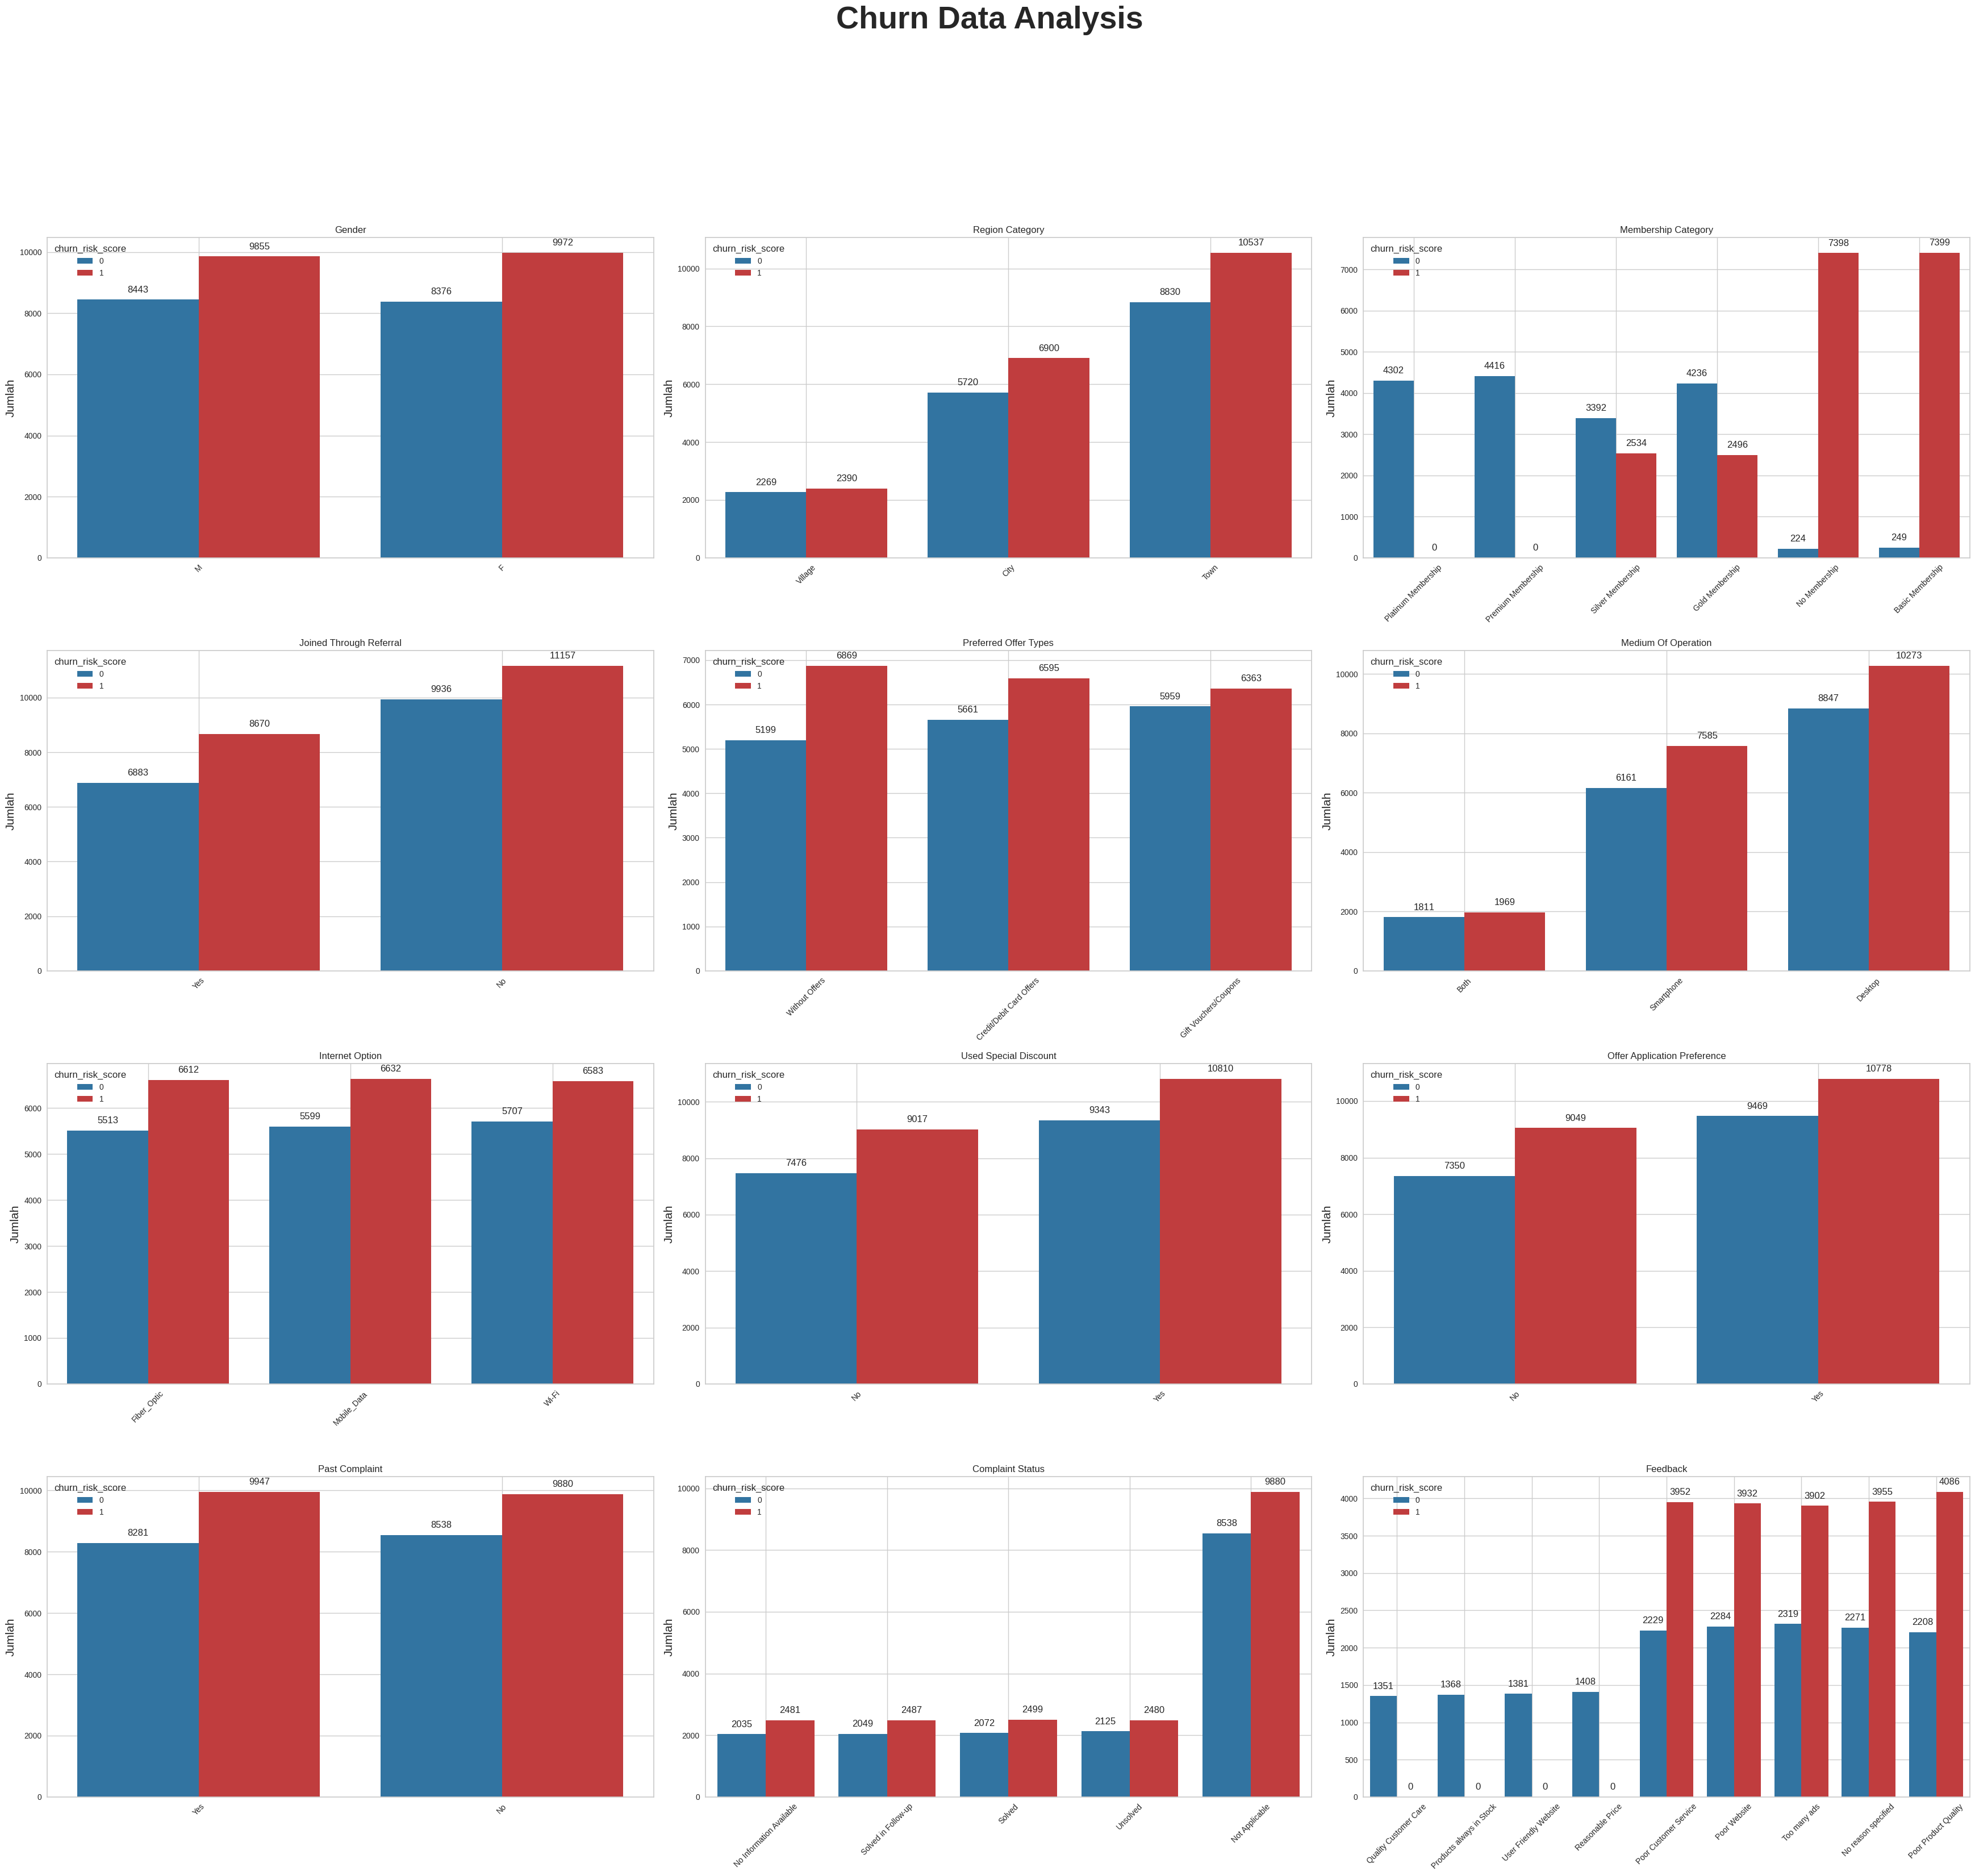

In [27]:
fig, axes = plt.subplots(ncols=3, nrows=4 , figsize=(35, 30))
colors = ['tab:blue', 'tab:red']

sns.countplot(data=df, x='gender', hue='churn_risk_score', order=df['gender'].value_counts(ascending=True).index, ax=axes[0,0],palette=colors)
sns.countplot(data=df, x='region_category', hue='churn_risk_score', order=df['region_category'].value_counts(ascending=True).index, ax=axes[0,1],palette=colors)
sns.countplot(data=df, x='membership_category', hue='churn_risk_score', order=df['membership_category'].value_counts(ascending=True).index, ax=axes[0,2],palette=colors)
sns.countplot(data=df, x='joined_through_referral', hue='churn_risk_score', order=df['joined_through_referral'].value_counts(ascending=True).index, ax=axes[1,0],palette=colors)
sns.countplot(data=df, x='preferred_offer_types', hue='churn_risk_score', order=df['preferred_offer_types'].value_counts(ascending=True).index, ax=axes[1,1],palette=colors)
sns.countplot(data=df, x='medium_of_operation', hue='churn_risk_score', order=df['medium_of_operation'].value_counts(ascending=True).index, ax=axes[1,2],palette=colors)
sns.countplot(data=df, x='internet_option', hue='churn_risk_score', order=df['internet_option'].value_counts(ascending=True).index, ax=axes[2,0],palette=colors)
sns.countplot(data=df, x='used_special_discount', hue='churn_risk_score', order=df['used_special_discount'].value_counts(ascending=True).index, ax=axes[2,1],palette=colors)
sns.countplot(data=df, x='offer_application_preference', hue='churn_risk_score', order=df['offer_application_preference'].value_counts(ascending=True).index, ax=axes[2,2],palette=colors)
sns.countplot(data=df, x='past_complaint', hue='churn_risk_score', order=df['past_complaint'].value_counts(ascending=True).index, ax=axes[3,0],palette=colors)
sns.countplot(data=df, x='complaint_status', hue='churn_risk_score', order=df['complaint_status'].value_counts(ascending=True).index, ax=axes[3,1],palette=colors)
sns.countplot(data=df, x='feedback', hue='churn_risk_score', order=df['feedback'].value_counts(ascending=True).index, ax=axes[3, 2],palette=colors)


for i in range(3):
    for j in range(4):
        ax = axes[j, i]
        ax.set_title(ax.get_xlabel().replace('_', ' ').title())
        ax.set_xlabel('')
        ax.set_ylabel('Jumlah', fontsize=15)  # Set y label font size to 16
        ax.set_xlabel(ax.get_xlabel().replace('_', ' ').title(), fontsize=18)  # Set x label font size to 14
        ax.grid(True)
        ax.tick_params(axis='x', labelrotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(format(height, '.0f'), 
                        xy=(p.get_x() + p.get_width() / 2., height),
                        xytext=(0, 7),
                        textcoords='offset points',
                        ha='center',
                        va='bottom')
plt.suptitle('Churn Data Analysis', fontsize=40, y=1.1, fontweight='bold')
plt.tight_layout()
plt.show()

---
`Output diatas dapat melihat dari masing-masing data category terhadap target`
> `Gender`= Dari kolom gender baik laki-laki maupun perempuan, keduanya lebih banyak yang churn daripada tidak.

> `region_category` = Dari kolom region, rata-rata lebih banyak yang churn dari pada tidak, namun tertinggi adlaah yang bersal dari `town`

> `membership_category` = Untuk `platinum` dan `premium` membership tidak ada yang churn namun untuk`not membership` dan `basic membership` sangat banyak yang churn.

> `joined_through_referral`= Untuk yang lebih banyak churn adalah yang masuk tanpa referral.

> `preferred_offer_types` = dari kolom ini, jenis penawaran yang paling banyak churn adalah `without offer`

> `medium_of_operation` = Yang paling banyak churn dari kolom ini adalah yang menggunakan `dekstop`

> `internet_option` = yang churn dari kolom ini `SAMA RATA`

> `used_special_discount` = Dari kolom ini,customer paling banyak churn yang `menggunakan discount`

> `offer_application_preference` = Dari kolom ini, sebagian besar customer churn yang lebih memilih untuk `menerima tawaran`

> `past_complaint` = Untuk kolom ini, untuk yang pernah mengajukan dan belum mengajukan keluhan memiliki jumlah yang serupa.

> `complaint_status` = Status dari komplain customer paling banyak yang churn adalah `Not Applicable`

> `feedback` = Dari jenis-jenis feedback yang diberikan customer, ada 4 yang tidak ada yang churn yaitu, `Products always in Stock`, `Reasonable Price`,`Quality Customer Care`, `User Friendly Website`

---

In [28]:
A= df[df['membership_category'].isin(['No Membership'])]
B= df[df['membership_category'].isin(['Basic Membership'])]
C= df[df['membership_category'].isin(['Silver Membership'])]
D= df[df['membership_category'].isin(['Premium Membership'])]
E= df[df['membership_category'].isin(['Gold Membership'])]
F= df[df['membership_category'].isin(['Platinum Membership'])]


<ipython-input-29-695120fa4d46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['joining_year_month'] = pd.to_datetime(A['joining_date']).dt.to_period('M')
<ipython-input-29-695120fa4d46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['joining_year_month'] = pd.to_datetime(B['joining_date']).dt.to_period('M')
<ipython-input-29-695120fa4d46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

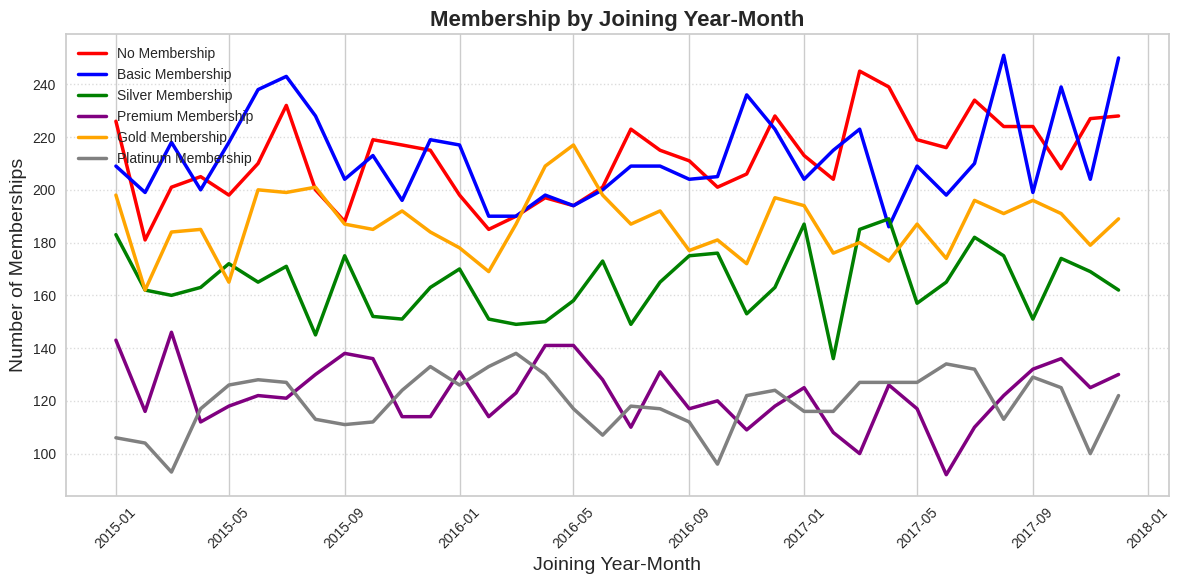

In [29]:
# Group the data by joining year and month and calculate the no membership for each month
A['joining_year_month'] = pd.to_datetime(A['joining_date']).dt.to_period('M')
B['joining_year_month'] = pd.to_datetime(B['joining_date']).dt.to_period('M')
C['joining_year_month'] = pd.to_datetime(C['joining_date']).dt.to_period('M')
D['joining_year_month'] = pd.to_datetime(D['joining_date']).dt.to_period('M')
E['joining_year_month'] = pd.to_datetime(E['joining_date']).dt.to_period('M')
F['joining_year_month'] = pd.to_datetime(F['joining_date']).dt.to_period('M')

data_grouped_A = A.groupby('joining_year_month')['membership_category'].count().reset_index()
data_grouped_B = B.groupby('joining_year_month')['membership_category'].count().reset_index()
data_grouped_C = C.groupby('joining_year_month')['membership_category'].count().reset_index()
data_grouped_D = D.groupby('joining_year_month')['membership_category'].count().reset_index()
data_grouped_E = E.groupby('joining_year_month')['membership_category'].count().reset_index()
data_grouped_F = F.groupby('joining_year_month')['membership_category'].count().reset_index()

# Convert joining_year_month to datetime object
data_grouped_A['joining_year_month'] = pd.to_datetime(data_grouped_A['joining_year_month'].astype(str))
data_grouped_B['joining_year_month'] = pd.to_datetime(data_grouped_B['joining_year_month'].astype(str))
data_grouped_C['joining_year_month'] = pd.to_datetime(data_grouped_C['joining_year_month'].astype(str))
data_grouped_D['joining_year_month'] = pd.to_datetime(data_grouped_D['joining_year_month'].astype(str))
data_grouped_E['joining_year_month'] = pd.to_datetime(data_grouped_E['joining_year_month'].astype(str))
data_grouped_F['joining_year_month'] = pd.to_datetime(data_grouped_F['joining_year_month'].astype(str))

# Create a line plot for each membership category
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='joining_year_month', y='membership_category', data=data_grouped_A, ax=ax, linewidth=2.5, color='red', label='No Membership')
sns.lineplot(x='joining_year_month', y='membership_category', data=data_grouped_B, ax=ax, linewidth=2.5, color='blue', label='Basic Membership')
sns.lineplot(x='joining_year_month', y='membership_category', data=data_grouped_C, ax=ax, linewidth=2.5, color='green', label='Silver Membership')
sns.lineplot(x='joining_year_month', y='membership_category', data=data_grouped_D, ax=ax, linewidth=2.5, color='purple', label='Premium Membership')
sns.lineplot(x='joining_year_month', y='membership_category', data=data_grouped_E, ax=ax, linewidth=2.5, color='orange', label='Gold Membership')
sns.lineplot(x='joining_year_month', y='membership_category', data=data_grouped_F, ax=ax, linewidth=2.5, color='gray', label='Platinum Membership')

# Set chart title and axis labels
ax.set_title('Membership by Joining Year-Month', fontsize=16, fontweight='bold')
ax.set_xlabel('Joining Year-Month', fontsize=14)
ax.set_ylabel('Number of Memberships', fontsize=14)

# Format x-axis tick labels
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', labelrotation=45)

# Add gridlines and adjust spacing
ax.grid(axis='y', linestyle=':', alpha=0.7)
fig.tight_layout()

# Show the chart
plt.show()
 


---
> Line Plot diatas merupakan plot dari masuknya customer sebagai member. dapat dilihat bahwa tidak ada pola dalam hal customer join sebagai member. Namuan dapat dilihat bahwa 2 Membership terbanyak adalah no membership dan basic membership.

---

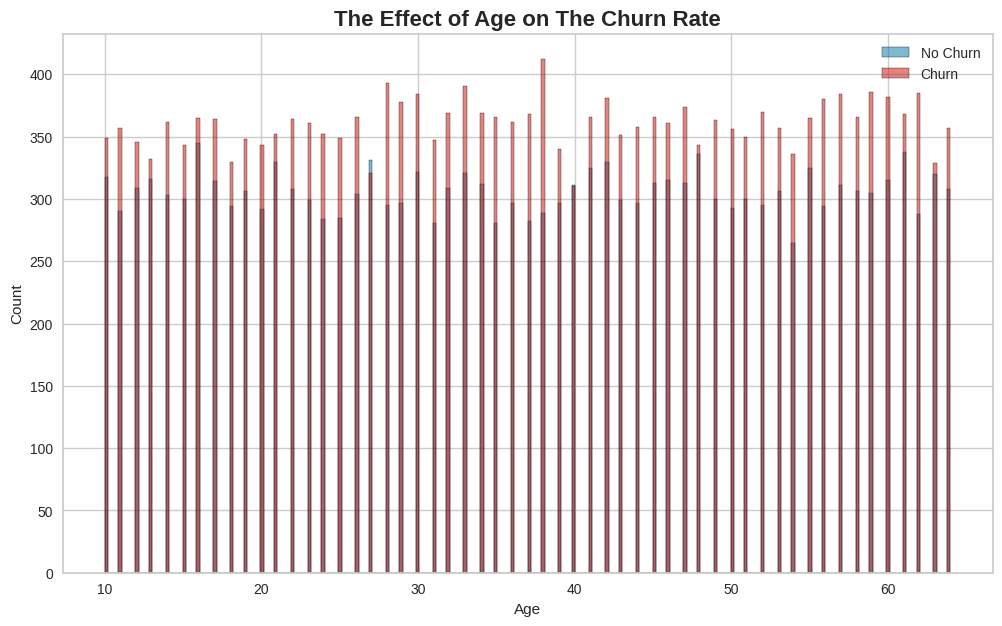

In [30]:
plt.figure(figsize=(12,7))

churn = df[df['churn_risk_score'] == 1]
no_churn = df[df['churn_risk_score'] == 0]

sns.histplot(no_churn['age'], bins=250, color='b', alpha=0.5, label='No Churn')
sns.histplot(churn['age'], bins=250, color='r', alpha=0.5, label='Churn')

plt.title('The Effect of Age on The Churn Rate', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.legend()
plt.show()

---
> Ini merupakan Plot Age, yang mana dapat dilihat hampir semua kalangan umur lebih banyak yang churn daripada yang tidak. namun pada umur 27 tahun lebih banyak yang tidak churn, walaupun selisihnya yang sedikit.

---

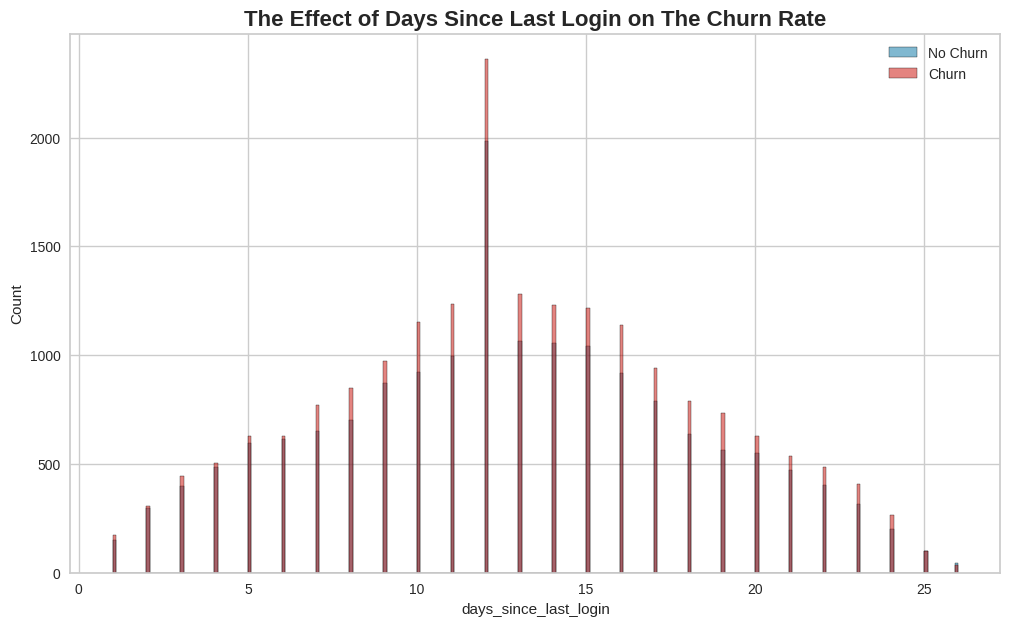

In [31]:
plt.figure(figsize=(12,7))

churn = df[df['churn_risk_score'] == 1]
no_churn = df[df['churn_risk_score'] == 0]

sns.histplot(no_churn['days_since_last_login'], bins=250, color='b', alpha=0.5, label='No Churn')
sns.histplot(churn['days_since_last_login'], bins=250, color='r', alpha=0.5, label='Churn')

plt.title('The Effect of Days Since Last Login on The Churn Rate', fontsize=16, fontweight='bold')
plt.xlabel('days_since_last_login')
plt.legend()
plt.show()

---
> Ini merupakan Plot days_since_last_login, yang mana dapat dilihat jumlah hari sejak pelanggan terakhir kali masuk ke situs web semuanya lebih banyak yang churn dibandingkan tidak. Terlebih lagi untuk 12 hari setelah terakhir login.

---

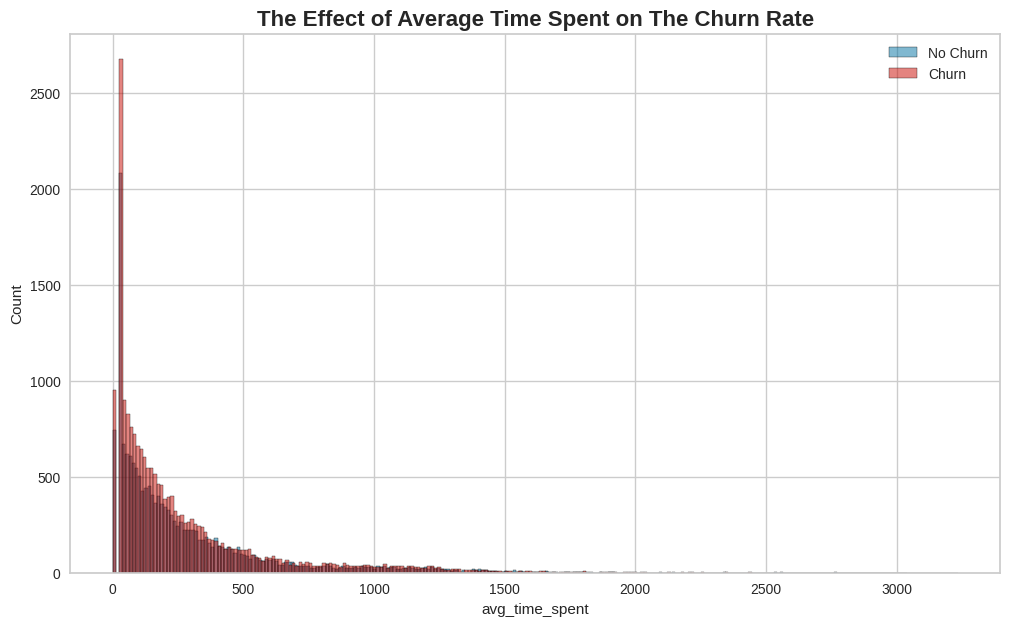

In [32]:
plt.figure(figsize=(12,7))

churn = df[df['churn_risk_score'] == 1]
no_churn = df[df['churn_risk_score'] == 0]

sns.histplot(no_churn['avg_time_spent'], bins=250, color='b', alpha=0.5, label='No Churn')
sns.histplot(churn['avg_time_spent'], bins=250, color='r', alpha=0.5, label='Churn')

plt.title('The Effect of Average Time Spent on The Churn Rate', fontsize=16, fontweight='bold')
plt.xlabel('avg_time_spent')
plt.legend()
plt.show()

---
> Ini merupakan Plot avg_time_spent, yang mana Rata-rata waktu yang dihabiskan oleh customer di situs web dari setiap rata-rata lebih banyak yang churn dibandingkan tidak churn.

---

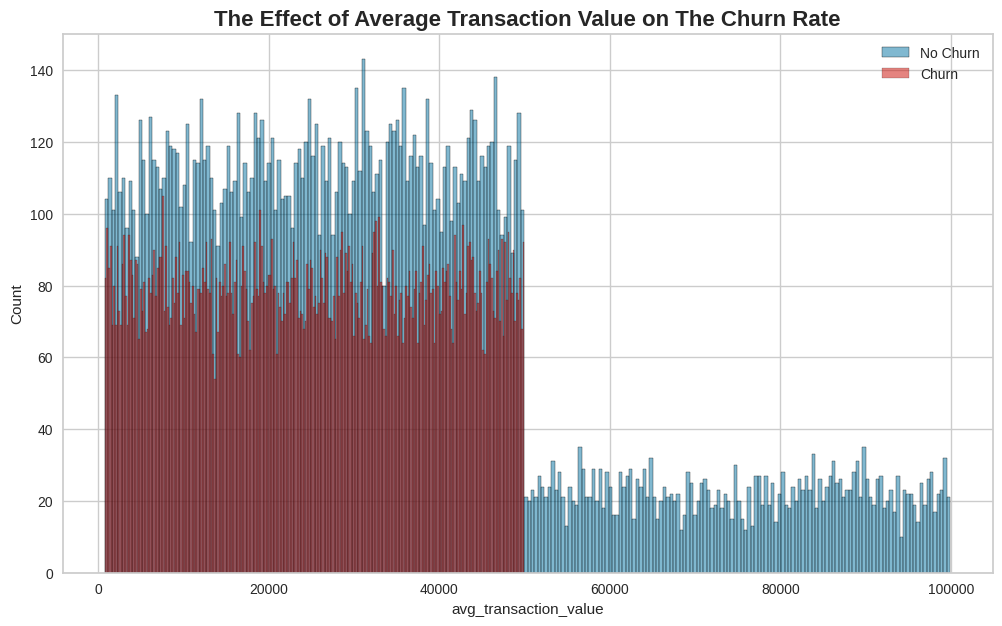

In [33]:
plt.figure(figsize=(12,7))

churn = df[df['churn_risk_score'] == 1]
no_churn = df[df['churn_risk_score'] == 0]

sns.histplot(no_churn['avg_transaction_value'], bins=250, color='b', alpha=0.5, label='No Churn')
sns.histplot(churn['avg_transaction_value'], bins=250, color='r', alpha=0.5, label='Churn')

plt.title('The Effect of Average Transaction Value on The Churn Rate', fontsize=16, fontweight='bold')
plt.xlabel('avg_transaction_value')
plt.legend()
plt.show()

---
> Ini merupakan Plot avg_transaction_value, Nilai transaksi rata-rata yang dilakukan oleh customer lebih banyak yang tidak churn. Terutama yang rata-rata pembayarannya diatas 50k tidak ada yang churn.

---

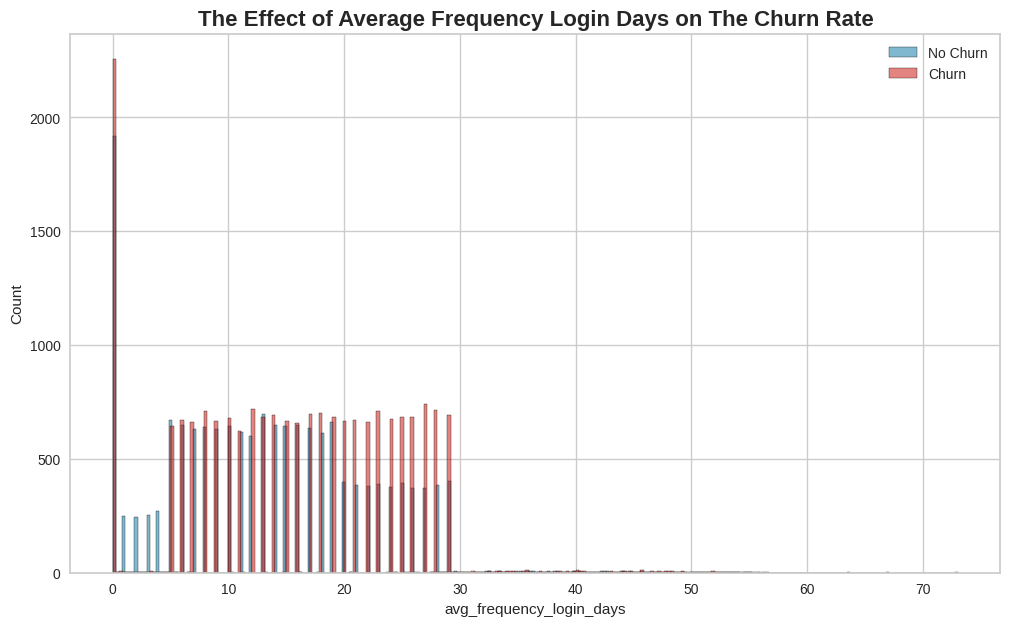

In [34]:
plt.figure(figsize=(12,7))

churn = df[df['churn_risk_score'] == 1]
no_churn = df[df['churn_risk_score'] == 0]

sns.histplot(no_churn['avg_frequency_login_days'], bins=250, color='b', alpha=0.5, label='No Churn')
sns.histplot(churn['avg_frequency_login_days'], bins=250, color='r', alpha=0.5, label='Churn')

plt.title('The Effect of Average Frequency Login Days on The Churn Rate', fontsize=16, fontweight='bold')
plt.xlabel('avg_frequency_login_days')
plt.legend()
plt.show()

---
> Ini merupakan Plot avg_frequency_login_days, yang mana Jumlah kali customer telah masuk ke situs web yang sangat parah churn-nya adalah yang hanya 0-1 kali login.

---

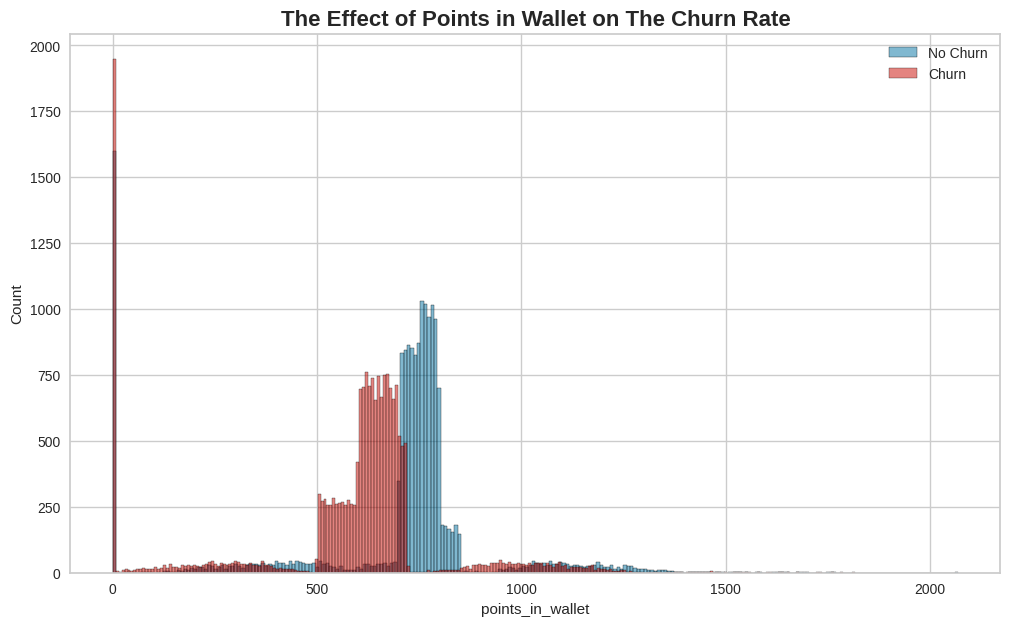

In [35]:
plt.figure(figsize=(12,7))

churn = df[df['churn_risk_score'] == 1]
no_churn = df[df['churn_risk_score'] == 0]

sns.histplot(no_churn['points_in_wallet'], bins=250, color='b', alpha=0.5, label='No Churn')
sns.histplot(churn['points_in_wallet'], bins=250, color='r', alpha=0.5, label='Churn')

plt.title('The Effect of Points in Wallet on The Churn Rate', fontsize=16, fontweight='bold')
plt.xlabel('points_in_wallet')
plt.legend()
plt.show()

---
> Ini merupakan Plot points_in_wallet, yang mana semakin sedikit poin semakin banyak juga yang churn, dan sebaliknya semakin banyak poinnya semakin sedikit yang churn.

---


# ⚙️ Feature Engineering

interval columns not set, guessing: ['churn_risk_score']


/usr/local/lib/python3.9/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable user_id is large: 36646. Are you sure this is not an interval variable? Analysis for pairs of variables including user_id can be slow.
  warnings.warn(


<Axes: >

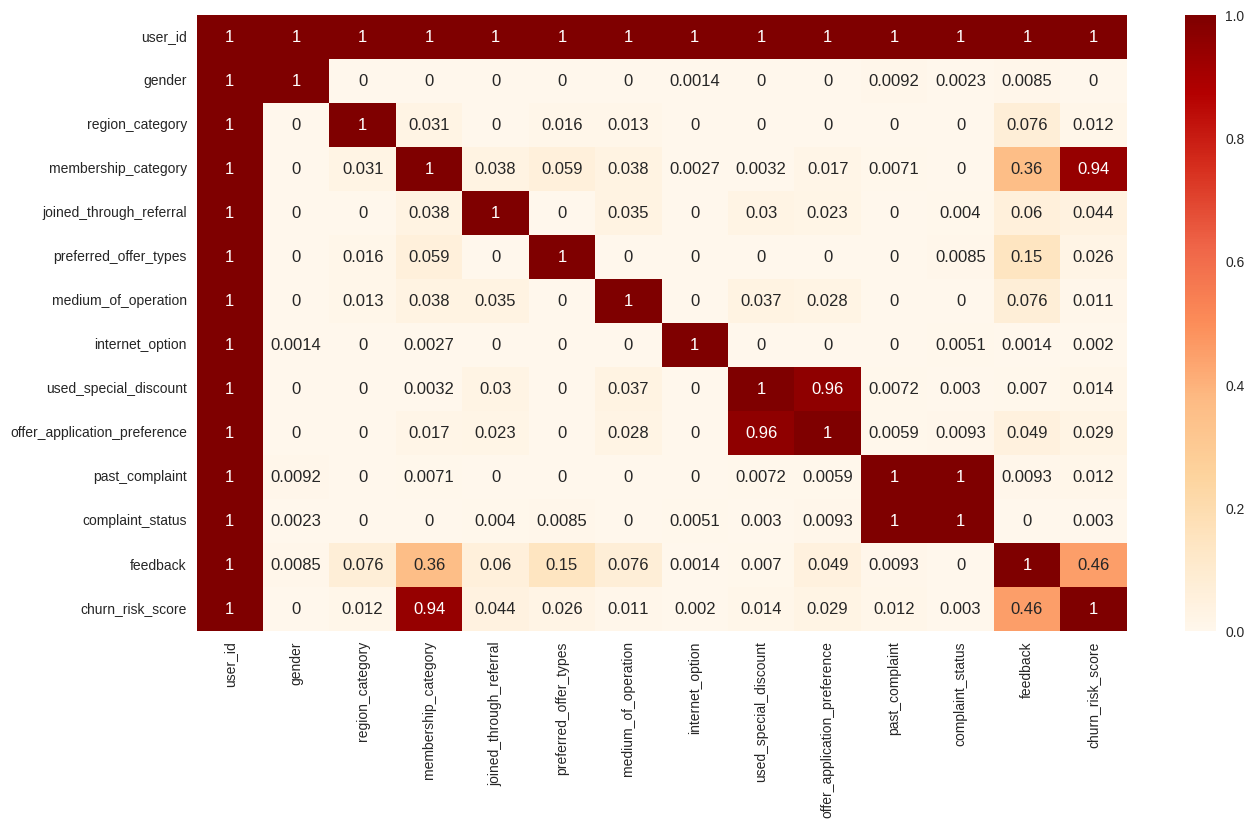

In [36]:
corr_matrix = df[['user_id', 'gender', 'region_category', 'membership_category','joined_through_referral', 'preferred_offer_types','medium_of_operation', 'internet_option', 'used_special_discount','offer_application_preference', 'past_complaint', 'complaint_status','feedback', 'churn_risk_score']].phik_matrix()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd')


interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


<Axes: >

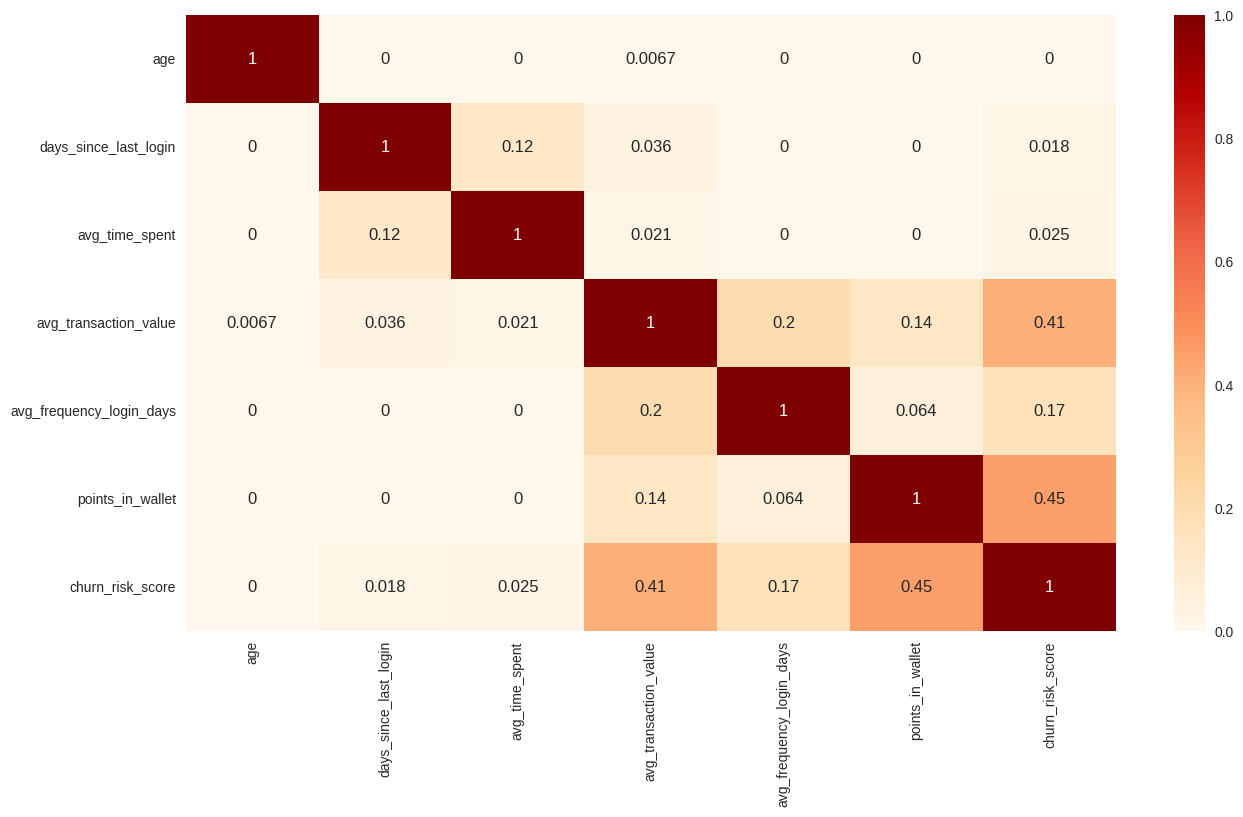

In [37]:
corr_matrix = df[['age', 'days_since_last_login', 'avg_time_spent','avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet','churn_risk_score']].phik_matrix()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd')


In [38]:
cat= ['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']
num = ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

feature = ['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']

selected = ['membership_category','joined_through_referral','feedback', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet']

---
> Diatas merupakan proses pencarian feature terbaik untuk dimasukan dalam prediksi menggunakan `phik_matrix`. 

> `cats` merupakan semua kolom yang merupakan ketegori

> `num` merupakan semua kolom yang merupakan numeric

> `feature` merupakan semua feature yang ada

> `selected` merupakan feature yang dipilih berdasarkan korelasinya terhadap target.

---

In [39]:
# Encoding to cek multikolinearity
from sklearn.compose import ColumnTransformer
new_df = df.copy()

gender = ['M', 'F']
region_category = ['Village','Town','City']
membership_category = ['Platinum Membership', 'Premium Membership', 'Silver Membership', 'Gold Membership', 'No Membership', 'Basic Membership']
joined_through_referral =['No','Yes']
preferred_offer_types = ['Without Offers', 'Credit/Debit Card Offers','Gift Vouchers/Coupons']
medium_of_operation = ['Both', 'Smartphone', 'Desktop' ]
internet_option = ['Fiber_Optic', 'Mobile_Data', 'Wi-Fi']
used_special_discount = ['No','Yes']
offer_application_preference = ['No','Yes']
past_complaint = ['No','Yes']
complaint_status = ['No Information Available', 'Solved in Follow-up', 'Solved', 'Unsolved','Not Applicable']
feedback = ['Quality Customer Care', 'Products always in Stock', 'User Friendly Website','Reasonable Price','Poor Customer Service','Poor Website', 'Too many ads', 'No reason specified','Poor Product Quality']



categorical_feature = ['gender', 'region_category', 'membership_category','joined_through_referral', 'preferred_offer_types','medium_of_operation', 'internet_option', 'used_special_discount','offer_application_preference', 'past_complaint', 'complaint_status','feedback']
categorical_transformer = OrdinalEncoder(categories=[gender, region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, internet_option, used_special_discount, offer_application_preference, past_complaint, complaint_status, feedback])
categorical_transformer.fit(new_df[categorical_feature])
new_df[categorical_feature]= categorical_transformer.transform(new_df[categorical_feature])

In [40]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)


In [41]:
calc_vif(new_df[selected])

,variables,VIF
2,feedback,6.392842
5,points_in_wallet,4.619444
0,membership_category,4.069334
4,avg_frequency_login_days,3.317391
3,avg_transaction_value,2.672302
1,joined_through_referral,1.696920


---
> Untuk memastikan apakah feature yang dipilih tepat, maka akan dilakuan uji multikolinearitas untuk melihat hubungan antar feature. hasil yang baik jika tidak ada nilai yang lebih dari 10.`semakin kecil semakin baik`

---

---
# ⚙️Preprocessing

---


## *Splitting*


In [42]:
# Dilakukan splitting Data Train, Test dan Val
X = df[selected]
y = df['churn_risk_score']

X_train_full, X_test,  y_train_full, y_test = train_test_split(X,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= y, random_state=0
                                                               )

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2, stratify= y_train_full,random_state=0)

In [43]:
# ini merupakan data training X dan y train
training = pd.concat([X_train, y_train], axis=1)
training.shape

(23452, 7)

In [44]:
num_train = ['avg_transaction_value','avg_frequency_login_days', 'points_in_wallet']

cat_train = ['membership_category','joined_through_referral', 'feedback']

## Normality

In [45]:
stat, p = shapiro(training[num_train])
print('Shapiro-Wilk test statistic:', stat)
print('Shapiro-Wilk p-value:', p)

Shapiro-Wilk test statistic: 0.632071852684021
Shapiro-Wilk p-value: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


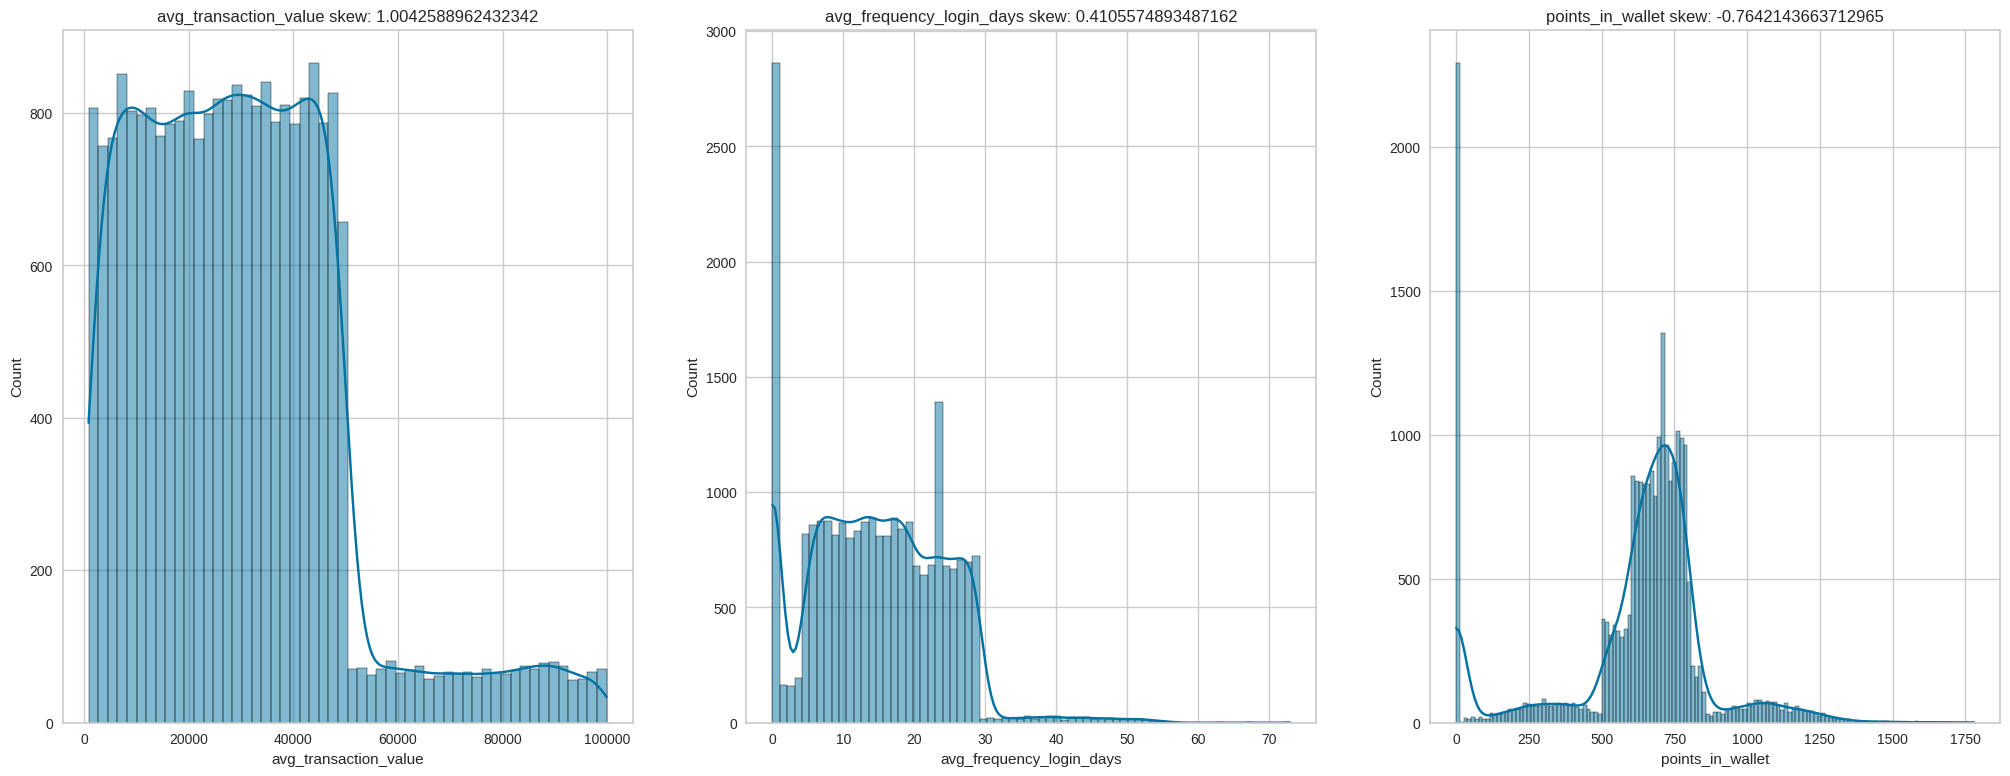

In [46]:
fig, ax = plt.subplots(ncols=3, figsize=[25,9])
for idx, col in enumerate(num_train):
    sns.histplot(training[col], ax=ax[idx], kde=True)
    ax[idx].set_title(f'{col} skew: {training[col].skew()}')
plt.show()


> Dilihat dari hasil Shapiro-Wilk, karena p-value < 0.05 maka data tidak terdistribusi normal

>Dan dilihat dari nilai skew, hanya kolom `avg_frequency_login_days` yang terdistribusi normal karena nilai skew  0.4< 0.05  

`oleh karena itu, perlu dilakuakan handling outliers agar data terdistribusi normal`

## *Handling Outliers*

### `Skew Normal (avg_frequency_login_days)`

In [47]:
avg_frequency_login_days_out= training.copy()
avg_frequency_login_days_out['Z-Score'] = stats.zscore(avg_frequency_login_days_out['avg_frequency_login_days'])
avg_frequency_login_days_out.head()

,membership_category,joined_through_referral,feedback,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,Z-Score
7400,Silver Membership,Yes,Poor Product Quality,26805.46,28.0,0.000000,0,1.407956
6810,Gold Membership,No,Poor Website,2524.84,26.0,713.490000,0,1.197289
19056,No Membership,Yes,Poor Website,43856.32,17.0,591.420000,1,0.249287
33283,Gold Membership,No,No reason specified,26797.60,28.0,668.650000,1,1.407956
22402,Basic Membership,No,No reason specified,41238.78,25.0,873.584896,1,1.091955


In [48]:
frequency_login_days_out =avg_frequency_login_days_out.loc[avg_frequency_login_days_out['Z-Score']> 3.00].sort_values(by='Z-Score', ascending=False)


print('percentage of outlier: ', frequency_login_days_out.shape[0]/avg_frequency_login_days_out.shape[0]*100, '%')

percentage of outlier:  0.8570697595087838 %


In [49]:
training.drop(frequency_login_days_out.index, inplace= True)

> Dapat dilihat bahwa untuk kolom terdistribusi normal dalam pengecekan outliers menggunakan metode z-score

> sejumlah 0.85% data outliers, sehingga data tersebut akan di drop (datanya kecil kurang dari 1%)

### `Skew Tidak Normal`

In [50]:
# calculate IQR and set upper and lower bounds for each column
cols = ['avg_transaction_value', 'points_in_wallet']
outliers = {}
for col in cols:
    Q1 = training[col].quantile(0.25)
    Q3 = training[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 3*IQR
    lower = Q1 - 3*IQR ## digunakna 3 karena saat menggunakna nilai 1.5 jumlah outlier sangat extreme
    outliers[col] = training[(training[col] > upper) | (training[col] < lower)][col]

    # print the results
    print(f"Count of outliers in {col}: {outliers[col].shape[0]}")
    print(f"Percentage of outliers in {col}: {np.round(outliers[col].shape[0]/len(training[col])*100,2)}%")
    print('-' * 50)


Count of outliers in avg_transaction_value: 0
Percentage of outliers in avg_transaction_value: 0.0%
--------------------------------------------------
Count of outliers in points_in_wallet: 2397
Percentage of outliers in points_in_wallet: 10.31%
--------------------------------------------------


In [51]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=cols)

training[cols] = wins.fit_transform(training[cols])

> Output diatas mengatakan bahwa kolom `avg_transaction_value` tidak terdapat outliers karena fold =3, namun untuk kolom `points_in_wallet` terdapat 2397 atau 10.31%

> Kareana banyaknya data, maka data outliers akan di capping menggunakan winsorizer.

## *Spliting Training and Testing*

In [52]:
#training
X_train = training.drop('churn_risk_score', axis=1)
y_train = training['churn_risk_score']

> split data train yang tadi di concat

## *Pendefinisian*

In [53]:
# Scaler
numeric_features = ['avg_transaction_value','avg_frequency_login_days', 'points_in_wallet']
numeric_transformer = MinMaxScaler()

# Encoder membership_category
membership_category = ['Platinum Membership', 'Premium Membership', 'Silver Membership', 'Gold Membership', 'No Membership', 'Basic Membership']
categorical_feature_membership_category = ['membership_category']
categorical_transformer_membership_category = OrdinalEncoder(categories=[membership_category])

# Encoder joined_through_referral
joined_through_referral = ['No','Yes']
categorical_feature_joined_through_referral = ['joined_through_referral']
categorical_transformer_joined_through_referral = OrdinalEncoder(categories=[joined_through_referral])

# Encoder feedback
feedback = ['Quality Customer Care', 'Products always in Stock', 'User Friendly Website','Reasonable Price','Poor Customer Service','Poor Website', 'Too many ads', 'No reason specified','Poor Product Quality']
categorical_feature_feedback = ['feedback']
categorical_transformer_feedback = OrdinalEncoder(categories=[feedback])

In [54]:
# Mentranform dengan column transformer yang akan dijalankan dengan pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("scal", numeric_transformer, numeric_features),
        ("ord_membership_category", categorical_transformer_membership_category, categorical_feature_membership_category),
        ("ord_joined_through_referral", categorical_transformer_joined_through_referral, categorical_feature_joined_through_referral),
        ("ord_feedback", categorical_transformer_feedback, categorical_feature_feedback)
    ]
)

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

In [55]:
X_train= pipeline.fit_transform(X_train)
X_val= pipeline.transform(X_val)
X_test= pipeline.transform(X_test)

In [56]:
training.shape

(23251, 7)

> Output diatas merupakan pendefinisian untuk pipeline scal dan encoding data.

## *Pipeline* 

In [57]:
#membuat pipeline tensorflow pada data train, data validasi dan data test
train_pipe_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64).repeat(3)
val_pipe_tf   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)
test_pipe_tf  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [58]:
#rumus untuk membantu menentukan jumlah neuron pada (1) hidden layer
alp = 10
inp = X_train.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 332


> Diatas merupakan proses pipeline dengan menggunakan tensorflow

sumber: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# 🎯 Model

## *Model Sequential*

> Model sequential adalah salah satu jenis arsitektur model dalam deep learning yang digunakan untuk membangun jaringan saraf tiruan (neural network) dengan urutan layer yang ditentukan. Dalam model sequential, setiap layer dihubungkan secara berurutan, sehingga output dari layer sebelumnya menjadi input dari layer selanjutnya. 

(sumber: https://towardsdatascience.com/a-comprehensive-introduction-to-tensorflows-sequential-api-and-model-for-deep-learning-c5e31aee49fa)

In [59]:
#define model
model_seq= Sequential()
model_seq.add(Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer = 'uniform'))
model_seq.add(Dense(hid, activation='relu', kernel_initializer = 'uniform')) 
model_seq.add(Dense(out, activation='sigmoid', kernel_initializer = 'uniform'))

#compile
model_seq.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 332)               2324      
                                                                 
 dense_2 (Dense)             (None, 1)                 333       
                                                                 
Total params: 2,699
Trainable params: 2,699
Non-trainable params: 0
_________________________________________________________________


> Activation 'relu' = Dalam model sequential, fungsi aktivasi ReLU dapat diimplementasikan pada layer-layer tertentu untuk menambahkan non-linearitas pada model dan membantu meningkatkan kemampuan pembelajaran jaringan saraf tiruan.

> Activation 'sigmoid' = Sigmoid adalah salah satu fungsi aktivasi yang populer digunakan pada jaringan saraf tiruan. Fungsi ini biasanya digunakan pada output layer pada masalah klasifikasi biner, dimana output yang dihasilkan oleh model adalah probabilitas atau skor prediksi untuk kelas positif.
> Pada parameter kernel_initializer, nilai 'uniform' 
menunjukkan bahwa bobot atau kernel akan diinisialisasi dengan distribusi seragam (uniform distribution) dalam rentang tertentu.

> loss='binary_crossentropy', fungsi loss yang digunakan adalah binary cross-entropy atau entropi silang biner, yang biasanya digunakan untuk masalah klasifikasi biner atau klasifikasi dengan dua kelas.

> optimizer= RMSprop Kecuali pada masalah yang sangat sederhana, optimizer ini hampir selalu memiliki performa yang jauh lebih baik daripada AdaGrad. Sebenarnya, ini adalah algoritma optimisasi yang disukai oleh banyak peneliti sebelum munculnya Adam.

sumber: https://keras.io/api/models/sequential/

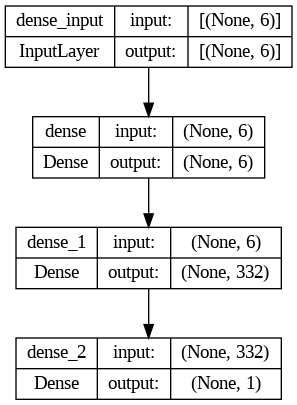

In [60]:
#plot model sequential
tf.keras.utils.plot_model(model_seq, show_shapes=True)

## *Model Tuning*

In [61]:
#define model (untuk dilakukan tuning)
model_seq_tune = Sequential()
model_seq_tune.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer='random_uniform',kernel_regularizer='l2'))
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(hid, activation='relu')) 
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(50, activation='relu')) 
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(10, activation='relu')) 
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(out, activation='sigmoid'))


#compile
model_seq_tune.compile(loss='binary_crossentropy', optimizer='AdaMax', metrics=['accuracy'])

model_seq_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 batch_normalization (BatchN  (None, 6)                24        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 332)               2324      
                                                                 
 batch_normalization_1 (Batc  (None, 332)              1328      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 50)                16650     
                                                                 
 batch_normalization_2 (Batc  (None, 50)              

> digunakan optimizer AdaMax karena AdaMax lebih stabil daripada Adam, namun ini tergantung pada dataset yang digunakan, dan secara umum Adam memiliki performa yang lebih baik. Jadi, AdaMax adalah salah satu opsi optimizer yang dapat Anda coba jika Anda mengalami masalah dengan Adam pada beberapa tugas tertentu.

Sumber: Kode.id

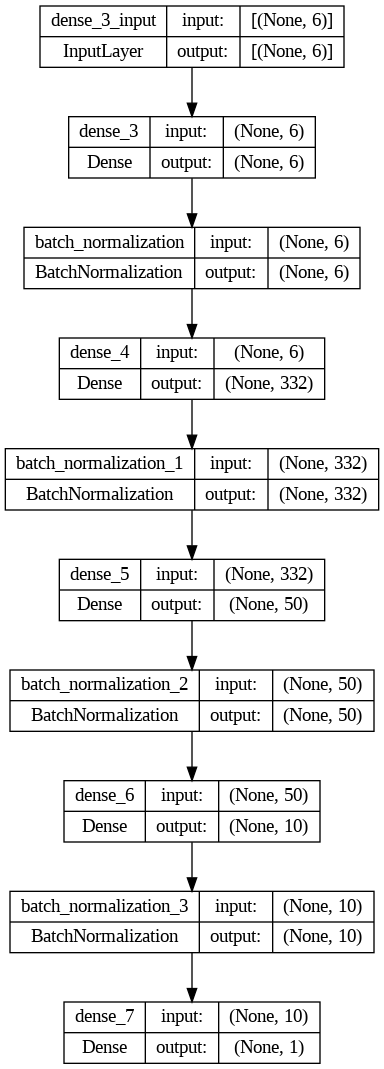

In [62]:
#plot model sequential tuning
tf.keras.utils.plot_model(model_seq_tune, show_shapes=True)

> Batch Normalization adalah teknik dalam deep learning yang digunakan untuk mengurangi masalah vanishing gradient dan mempercepat pelatihan model. Teknik ini memungkinkan kita untuk menormalkan input pada setiap layer sehingga memudahkan algoritma pembelajaran untuk menemukan solusi yang optimal.
Batch Normalization biasanya diterapkan setelah aktivasi pada setiap layer. 

(sumber: https://keras.io/api/models/sequential/)

## *Model Functional API*

In [63]:
#define model functional API
input_lyr = tf.keras.layers.Input(shape=(X_train.shape[1],))
layer1 = tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='random_uniform',kernel_regularizer='l2')(input_lyr)
layer2 = tf.keras.layers.Dense(hid, activation='relu',kernel_initializer='random_uniform')(layer1)
output_lyr = tf.keras.layers.Dense(out, activation='sigmoid',kernel_initializer='random_uniform')(layer2)

model_func= tf.keras.models.Model(inputs=input_lyr, outputs=output_lyr)

#compile
model_func.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 332)               2324      
                                                                 
 dense_10 (Dense)            (None, 1)                 333       
                                                                 
Total params: 2,699
Trainable params: 2,699
Non-trainable params: 0
_________________________________________________________________


> Digunakan optimizer 'Adam' yang mana merupakan parameter pada fungsi compile pada TensorFlow/Keras yang menentukan algoritma optimasi yang digunakan selama proses pelatihan jaringan saraf tiruan (neural network).


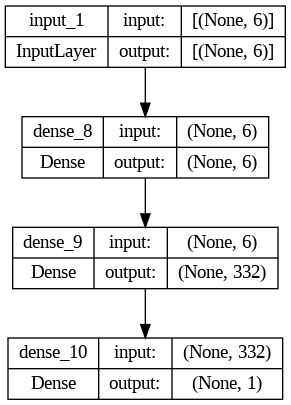

In [64]:
#plot model functional API
tf.keras.utils.plot_model(model_func, show_shapes=True)

## *Model Tuning (Functional API)*

> Model Functional API adalah salah satu cara untuk membuat model neural network dalam TensorFlow/Keras yang lebih fleksibel dan dapat menangani kasus-kasus yang lebih kompleks dibandingkan dengan model sequential. Model ini memungkinkan kita untuk membuat model yang memiliki beberapa input/output, dan juga mengizinkan kita untuk membuat model dengan arsitektur yang tidak linier seperti skip connections atau shared layers. 

(sumber: https://keras.io/guides/functional_api/)

In [65]:
#define model functional API untuk tuning
input_lyr = tf.keras.layers.Input(shape=(X_train.shape[1],))
layer1 = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='random_uniform',kernel_regularizer='l2')(input_lyr)
layer2 = tf.keras.layers.BatchNormalization()(layer1)
layer3 = tf.keras.layers.Dense(hid,activation='relu',kernel_initializer='random_uniform')(layer2)
layer4 = tf.keras.layers.BatchNormalization()(layer3)
layer5 = tf.keras.layers.Dense(50,activation='relu',kernel_initializer='random_uniform')(layer4)
layer6 = tf.keras.layers.BatchNormalization()(layer5)
layer7 = tf.keras.layers.Dense(10,activation='relu',kernel_initializer='random_uniform')(layer6)
layer8 = tf.keras.layers.BatchNormalization()(layer7)
output_lyr = tf.keras.layers.Dense(out,activation='sigmoid',kernel_initializer='random_uniform')(layer8)

model_func_tune = tf.keras.models.Model(inputs=input_lyr,outputs=output_lyr)

#compile
model_func_tune.compile(loss='binary_crossentropy', optimizer='AdaMax', metrics=['Accuracy'])

model_func_tune.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_11 (Dense)            (None, 6)                 42        
                                                                 
 batch_normalization_4 (Batc  (None, 6)                24        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 332)               2324      
                                                                 
 batch_normalization_5 (Batc  (None, 332)              1328      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 50)                1665

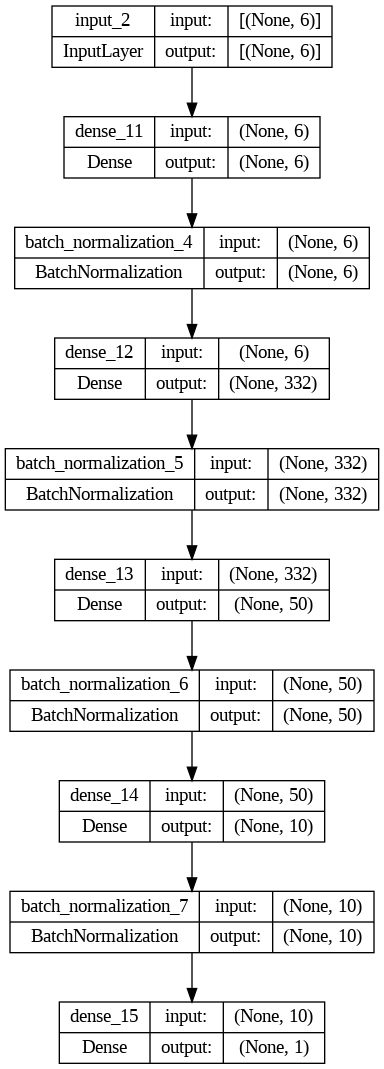

In [66]:
#plot model functional API yang sudah dituning
tf.keras.utils.plot_model(model_func_tune, show_shapes=True)

# 💪 Training

> Early stopping adalah teknik yang digunakan dalam deep learning untuk mencegah overfitting pada model dan mempercepat proses pelatihan model. Teknik ini melibatkan penghentian pelatihan model sebelum mencapai jumlah epoch yang ditentukan, berdasarkan kondisi-kondisi tertentu. 

(sumber: https://keras.io/api/callbacks/early_stopping/)

In [67]:
early_stop = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights= True)

- monitor='val_loss' pada callback EarlyStopping menandakan bahwa model akan dipantau berdasarkan nilai loss pada data validasi selama pelatihan.

- patience=5 menandakan bahwa pelatihan akan dihentikan jika nilai loss pada data validasi tidak mengalami penurunan selama 5 epoch berturut-turut. Artinya, jika tidak terjadi penurunan loss pada data validasi selama 5 epoch, maka pelatihan akan dihentikan.

- restore_best_weights=True menandakan bahwa model akan dikembalikan ke keadaan terbaik selama pelatihan, yaitu pada epoch dimana loss pada data validasi paling rendah. Dengan kata lain, jika early stopping terjadi, maka model yang dikembalikan adalah model pada epoch dimana loss pada data validasi paling rendah.

sumber: https://keras.io/api/callbacks/early_stopping/

> Dibawah ini adalah proses training untuk model sequential, sequential tuned, functional API dan functional API tuned:

## Model Sequential Training

In [68]:
%%time
train_seq = model_seq.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/50
1092/1092 [==============================] - 3s 2ms/step - loss: 0.3216 - accuracy: 0.8357 - val_loss: 0.3032 - val_accuracy: 0.8394
Epoch 2/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.2901 - accuracy: 0.8454 - val_loss: 0.2968 - val_accuracy: 0.8388
Epoch 3/50
1092/1092 [==============================] - 3s 3ms/step - loss: 0.2853 - accuracy: 0.8453 - val_loss: 0.2915 - val_accuracy: 0.8406
Epoch 4/50
1092/1092 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.8458 - val_loss: 0.2878 - val_accuracy: 0.8404
Epoch 5/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.2778 - accuracy: 0.8462 - val_loss: 0.2828 - val_accuracy: 0.8409
Epoch 6/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.2738 - accuracy: 0.8462 - val_loss: 0.2766 - val_accuracy: 0.8424
Epoch 7/50
1092/1092 [==============================] - 3s 3ms/step - loss: 0.2694 - accuracy: 0.8474 - val_loss: 0.2708 - val_accuracy:

> Ini merupakan training data sequential sebelum tuning yang mana memiliki hasil `accuracy` terakhir 0.931 dengan waktu training 3mins 1 s 

## Model Sequential Tuning Training

In [69]:
%%time
train_seq_tuned = model_seq_tune.fit(train_pipe_tf, epochs=100, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/100
1092/1092 [==============================] - 8s 5ms/step - loss: 0.2808 - accuracy: 0.8504 - val_loss: 0.2520 - val_accuracy: 0.8568
Epoch 2/100
1092/1092 [==============================] - 6s 6ms/step - loss: 0.2565 - accuracy: 0.8732 - val_loss: 0.2158 - val_accuracy: 0.9141
Epoch 3/100
1092/1092 [==============================] - 6s 5ms/step - loss: 0.2171 - accuracy: 0.9103 - val_loss: 0.1834 - val_accuracy: 0.9253
Epoch 4/100
1092/1092 [==============================] - 4s 4ms/step - loss: 0.2025 - accuracy: 0.9152 - val_loss: 0.1721 - val_accuracy: 0.9265
Epoch 5/100
1092/1092 [==============================] - 6s 5ms/step - loss: 0.1946 - accuracy: 0.9199 - val_loss: 0.1679 - val_accuracy: 0.9299
Epoch 6/100
1092/1092 [==============================] - 4s 4ms/step - loss: 0.1887 - accuracy: 0.9224 - val_loss: 0.1796 - val_accuracy: 0.9200
Epoch 7/100
1092/1092 [==============================] - 6s 6ms/step - loss: 0.1847 - accuracy: 0.9238 - val_loss: 0.1900 - val_ac

> Ini merupakan training data sequential setelah tuning yang mana memiliki hasil accuracy terakhir 0.927 dengan waktu training lebih seingkat 1 min 11s 

## Model Functional API Training

In [70]:
%%time
train_func = model_func.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/50
1092/1092 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8340 - val_loss: 0.3044 - val_accuracy: 0.8448
Epoch 2/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.3029 - accuracy: 0.8472 - val_loss: 0.2913 - val_accuracy: 0.8433
Epoch 3/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.2910 - accuracy: 0.8459 - val_loss: 0.2846 - val_accuracy: 0.8433
Epoch 4/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.2857 - accuracy: 0.8461 - val_loss: 0.2820 - val_accuracy: 0.8435
Epoch 5/50
1092/1092 [==============================] - 3s 3ms/step - loss: 0.2831 - accuracy: 0.8464 - val_loss: 0.2804 - val_accuracy: 0.8428
Epoch 6/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.2814 - accuracy: 0.8468 - val_loss: 0.2793 - val_accuracy: 0.8411
Epoch 7/50
1092/1092 [==============================] - 2s 2ms/step - loss: 0.2804 - accuracy: 0.8472 - val_loss: 0.2784 - val_accuracy:

> Ini merupakan training data functional API  sebelum tuning yang mana memiliki hasil accuracy terakhir 0.890 dengan waktu training 2mins 46 s 

## Model Functional API Tuning Training

In [71]:
%%time
train_func_tuned = model_func_tune.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/50
1092/1092 [==============================] - 8s 5ms/step - loss: 0.3126 - Accuracy: 0.8510 - val_loss: 0.2669 - val_Accuracy: 0.8559
Epoch 2/50
1092/1092 [==============================] - 7s 6ms/step - loss: 0.2328 - Accuracy: 0.8986 - val_loss: 0.2102 - val_Accuracy: 0.9089
Epoch 3/50
1092/1092 [==============================] - 6s 6ms/step - loss: 0.2029 - Accuracy: 0.9144 - val_loss: 0.1778 - val_Accuracy: 0.9248
Epoch 4/50
1092/1092 [==============================] - 4s 4ms/step - loss: 0.1941 - Accuracy: 0.9184 - val_loss: 0.1700 - val_Accuracy: 0.9255
Epoch 5/50
1092/1092 [==============================] - 6s 6ms/step - loss: 0.1886 - Accuracy: 0.9224 - val_loss: 0.1694 - val_Accuracy: 0.9263
Epoch 6/50
1092/1092 [==============================] - 5s 4ms/step - loss: 0.1849 - Accuracy: 0.9245 - val_loss: 0.1634 - val_Accuracy: 0.9306
Epoch 7/50
1092/1092 [==============================] - 4s 4ms/step - loss: 0.1822 - Accuracy: 0.9254 - val_loss: 0.1612 - val_Accuracy:

> Ini merupakan training data functional API setelah tuning yang mana memiliki hasil accuracy terakhir 0.931 dengan waktu training lebih singkat 1mins 23 s 

#  📋 Model Evaluation

## Sequential Evaluation

In [72]:
history_seq_df = pd.DataFrame(train_seq.history)

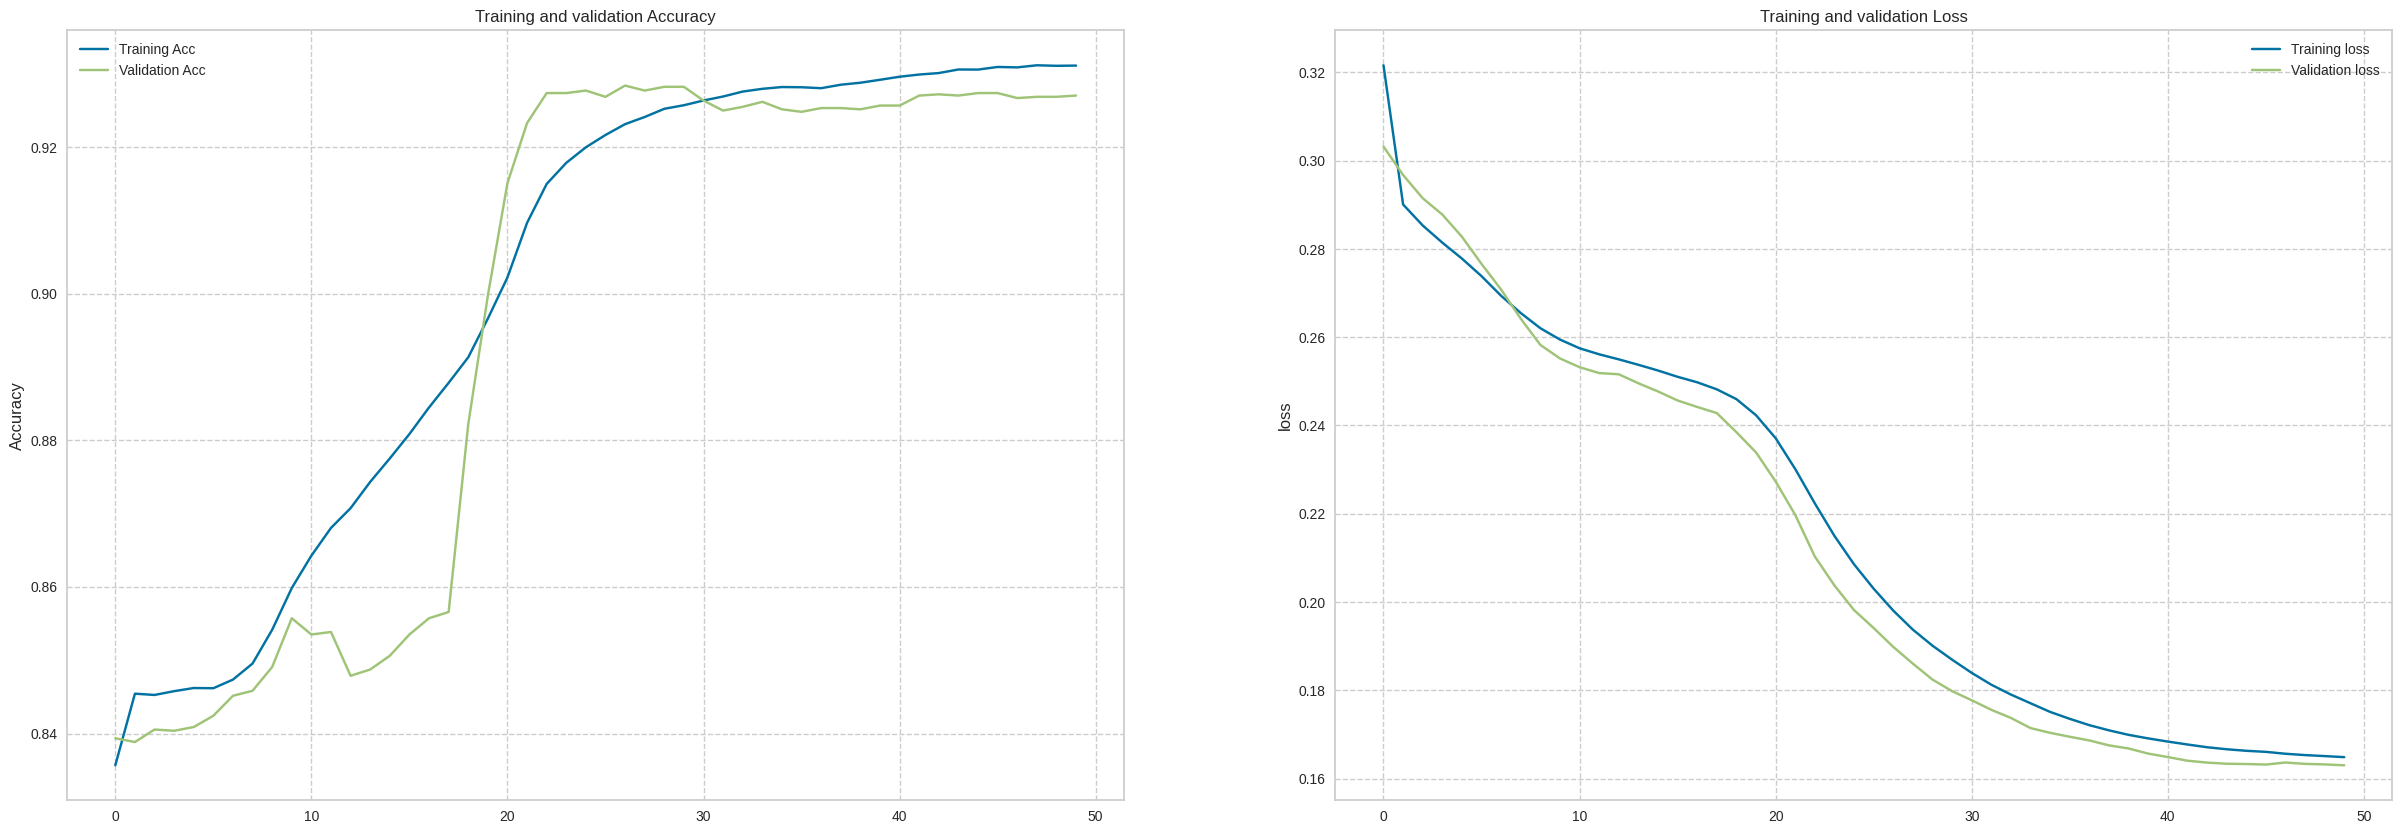

In [73]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_seq_df['accuracy'], label='Training Acc')
plt.plot(history_seq_df['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_seq_df['loss'], label='Training loss')
plt.plot(history_seq_df['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [74]:
y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3364
           1       0.89      0.98      0.93      3966

    accuracy                           0.92      7330
   macro avg       0.93      0.92      0.92      7330
weighted avg       0.93      0.92      0.92      7330



Text(70.72222222222221, 0.5, 'True Label')

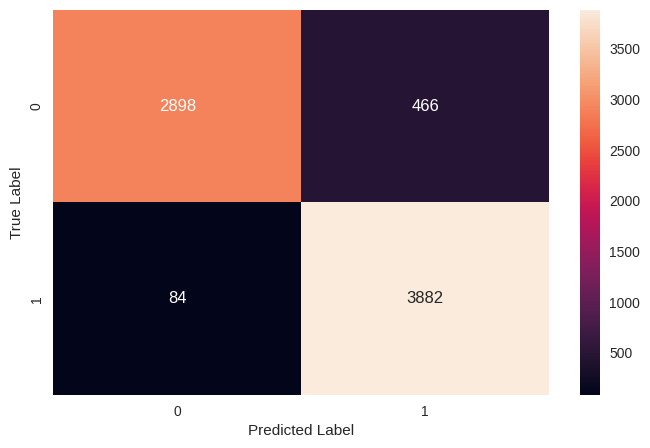

In [75]:
cm_seq = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq)
plt.figure(figsize = (8,5))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

> Data diatas merupakan hasil evaluasi dari sequential Evaluation sebelum tuning. yang mana dalam nilai loss dan accuracy cukup bagus karena jaraknya yang kecil dan dapat dikatakan good fit.

> Pada kali ini akan fokus pada f1-score karena baik churn atau no churn merupakan data yang penting dan tidak bisa dipilih harus fokus pada FN atau FP

`nilai f1 score 0.91-> 0`
`nilai f1 score 0.93-> 1`

Rata-rata dari recall dan precision

## Sequential Tuning Evaluation

In [76]:
history_seq_tuned_df = pd.DataFrame(train_seq_tuned.history)

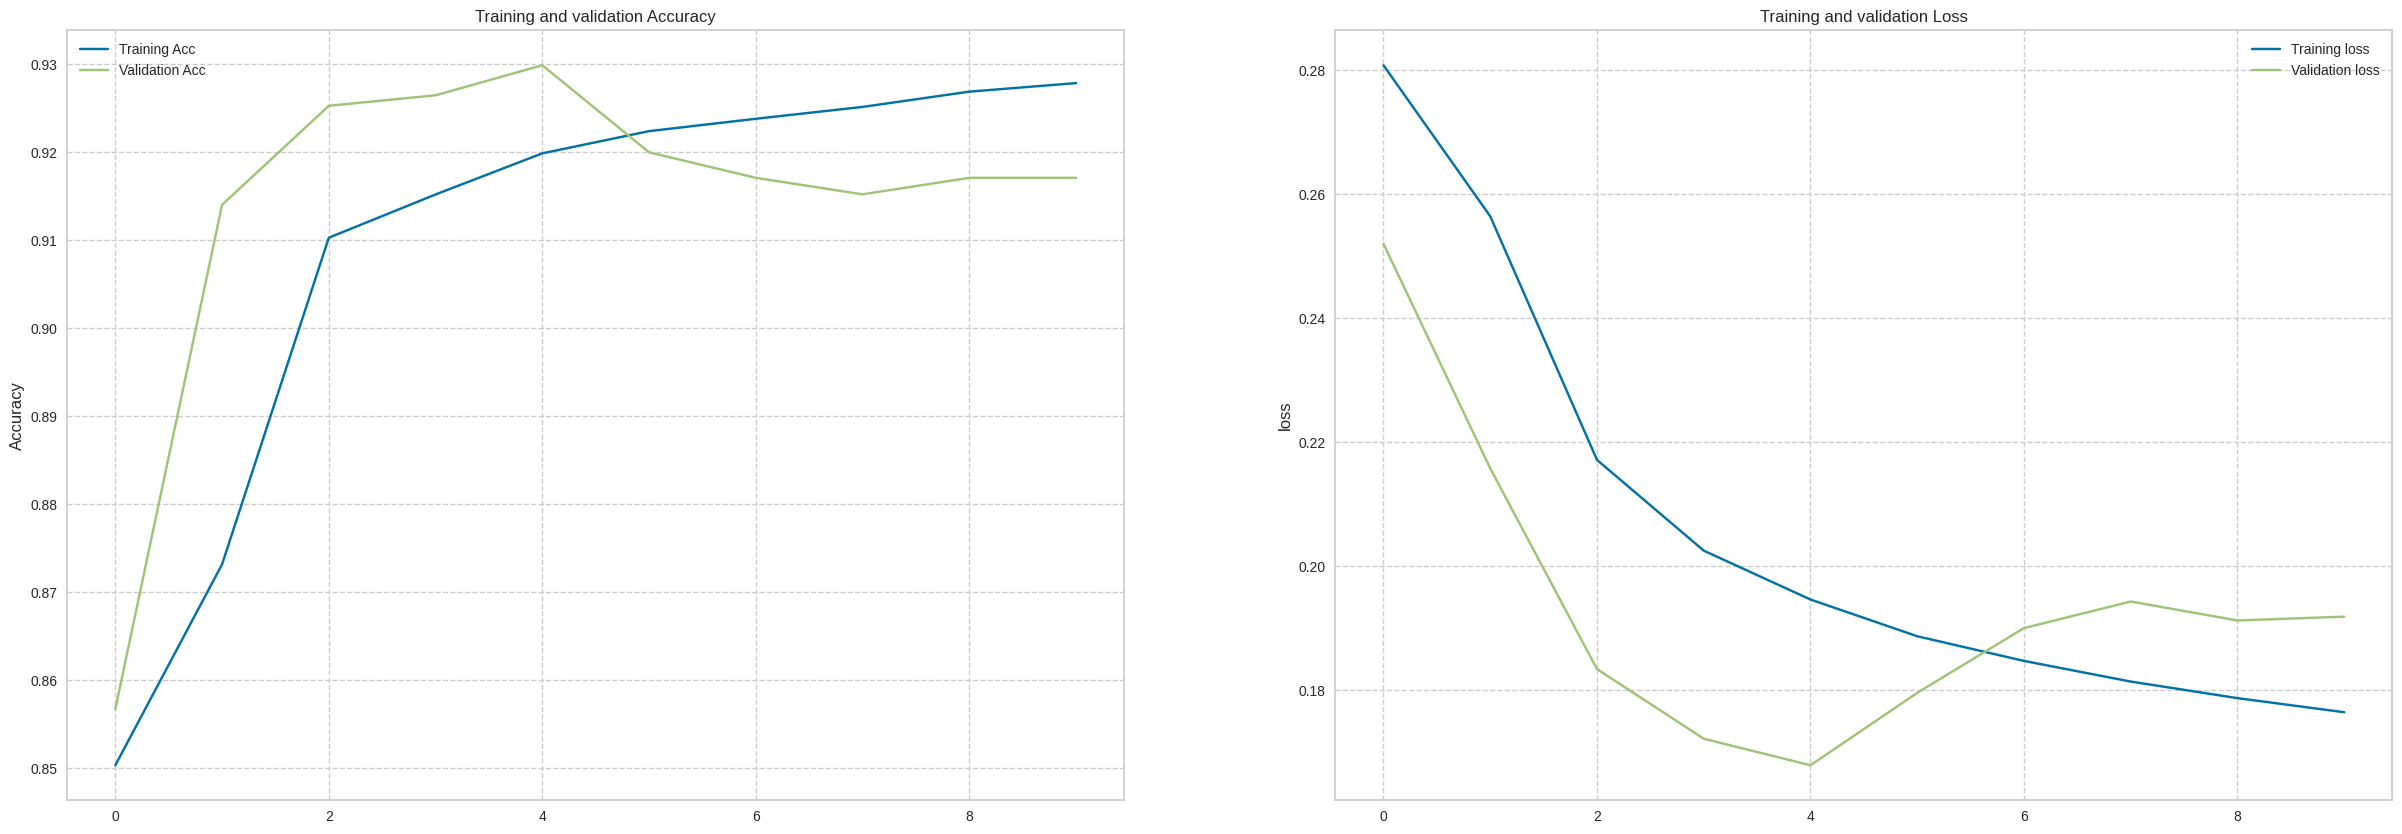

In [77]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_seq_tuned_df['accuracy'], label='Training Acc')
plt.plot(history_seq_tuned_df['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_seq_tuned_df['loss'], label='Training loss')
plt.plot(history_seq_tuned_df['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [78]:
y_pred_seq_tuned = model_seq_tune.predict(X_test)
y_pred_seq_tuned = np.where(y_pred_seq_tuned >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_tuned))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3364
           1       0.94      0.92      0.93      3966

    accuracy                           0.92      7330
   macro avg       0.92      0.92      0.92      7330
weighted avg       0.92      0.92      0.92      7330



Text(70.72222222222221, 0.5, 'True Label')

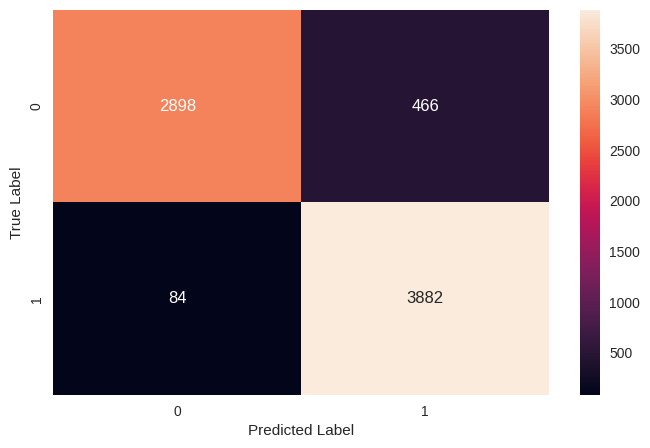

In [79]:
cm_seq_tuned = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_tuned)
plt.figure(figsize = (8,5))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

> Data diatas merupakan hasil evaluasi dari sequential Evaluation setelah tuning. yang mana dalam nilai loss dan accuracy cukup bagus karena jaraknya yang kecil dan dapat dikatakan good fit.

> Pada kali ini akan fokus pada f1-score karena baik churn atau no churn merupakan data yang penting dan tidak bisa dipilih harus fokus pada FN atau FP

`nilai f1 score 0.92-> 0`
`nilai f1 score 0.93-> 1`

Rata-rata dari recall dan precision

### **Sequential vs Sequential Tuning:**

> Perbedaan antara model sequential sebelum dan sesudah dituning berada pada waktu training nya dimana model sequential sebelum dilakukan training membutuhkan waktu sekitar 3 menit sedangkan setelah dituning hanya membutuhkan waktu 1 menit, sehingga setelah dituning, proses trainingnya jadi lebih cepat.

> walaupun nilai F1 score dari keduanya secara overall lebih baik setelah tuning karena saat target 0 f1-score lebih besar dari sebelum tuning

## Functional API Evaluation

In [80]:
history_func_df = pd.DataFrame(train_func.history)

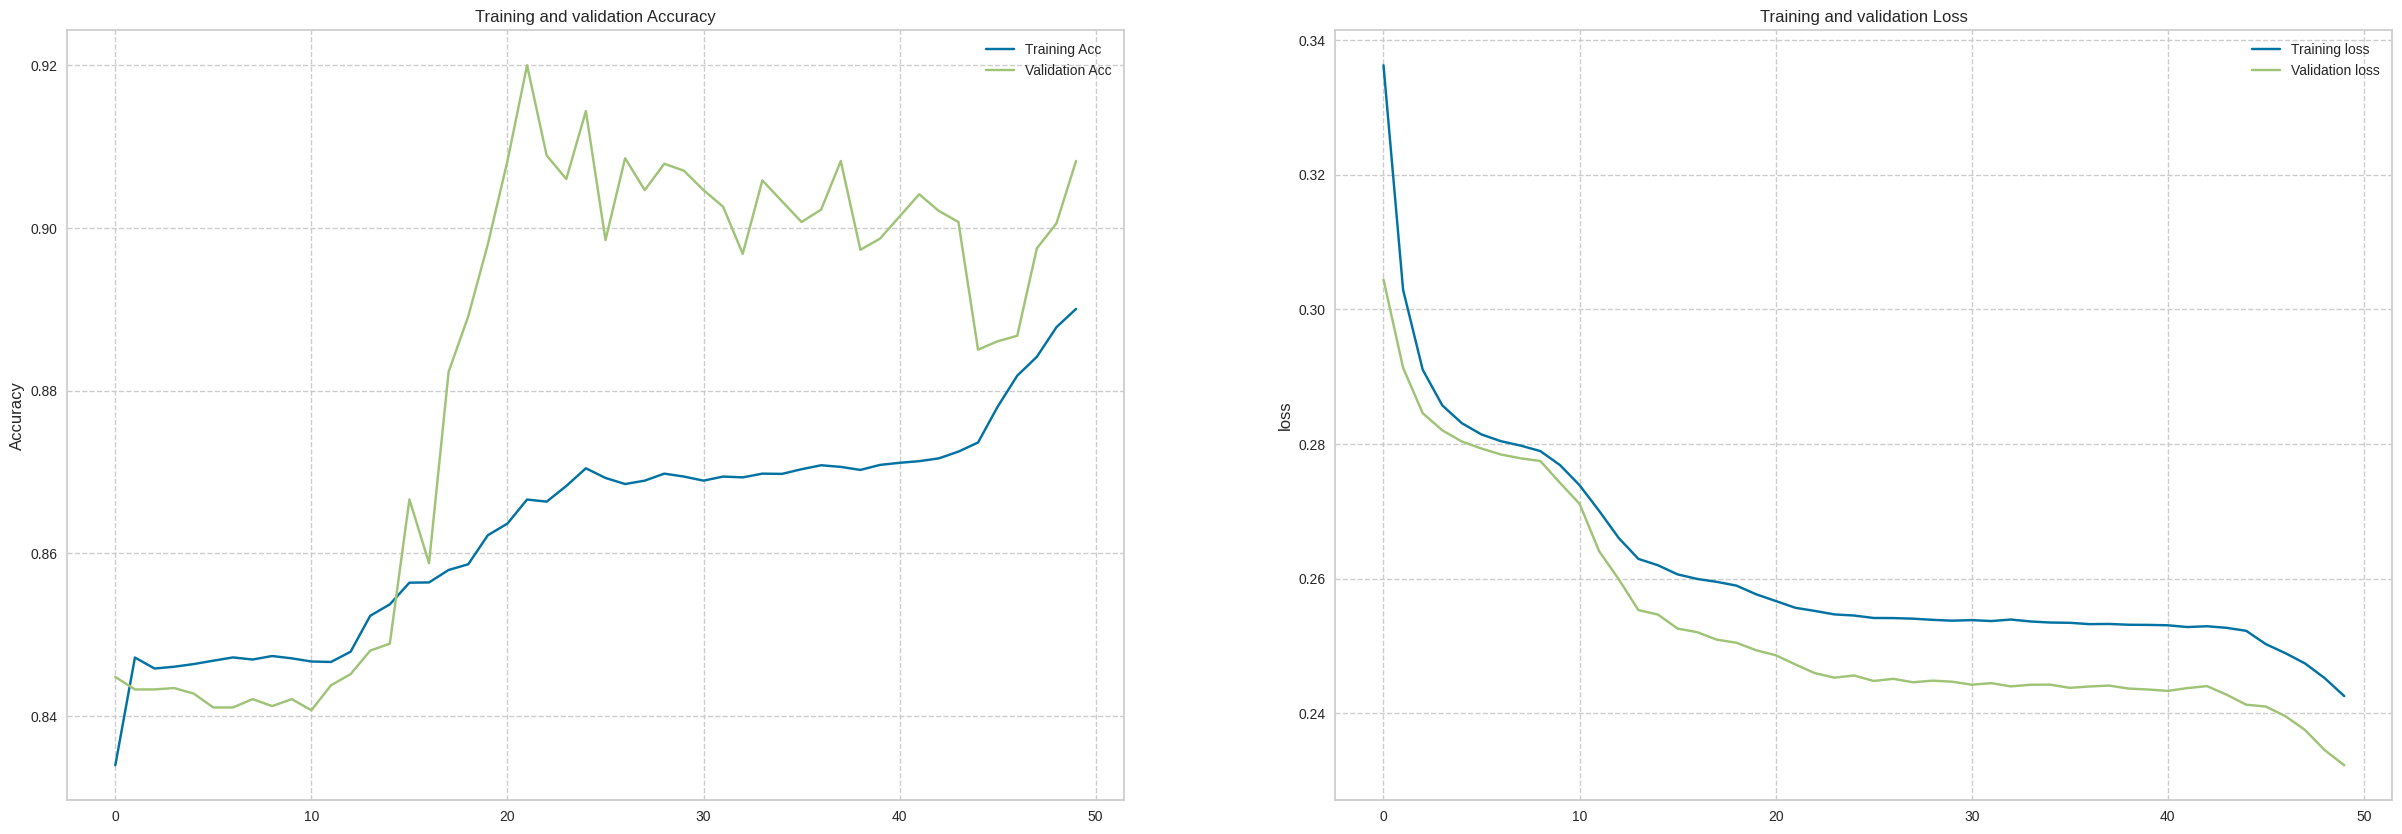

In [81]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_func_df['accuracy'], label='Training Acc')
plt.plot(history_func_df['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_func_df['loss'], label='Training loss')
plt.plot(history_func_df['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [82]:
y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3364
           1       0.92      0.89      0.90      3966

    accuracy                           0.90      7330
   macro avg       0.90      0.90      0.90      7330
weighted avg       0.90      0.90      0.90      7330



Text(95.72222222222221, 0.5, 'True Label')

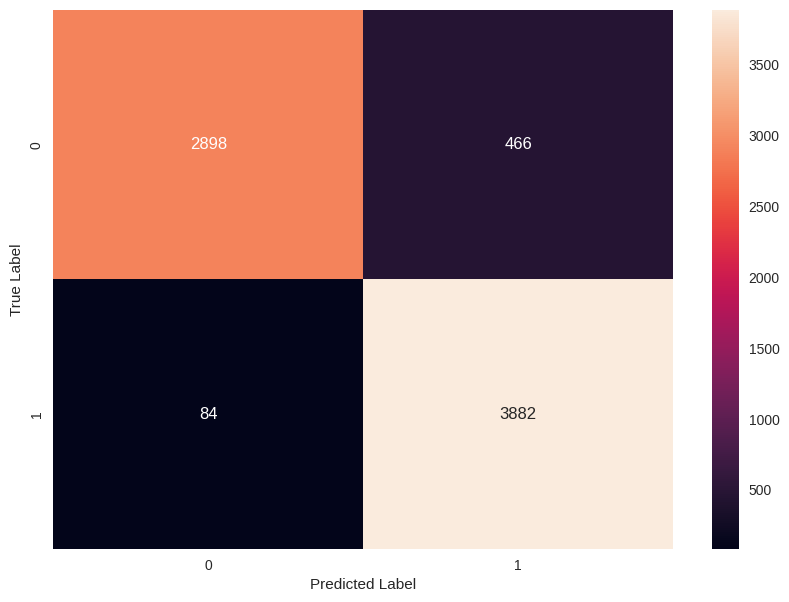

In [83]:
cm_func = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

> Data diatas merupakan hasil evaluasi dari funtional API Evaluation sebelum tuning. yang mana dalam nilai loss cukup baik namun accuracy cukup tidak baik karena jaraknya yang cukup besar dapaat diindikasikan terdapat exploding atau tidak stabil.

> Pada kali ini akan fokus pada f1-score karena baik churn atau no churn merupakan data yang penting dan tidak bisa dipilih harus fokus pada FN atau FP

`nilai f1 score 0.89-> 0`
`nilai f1 score 0.90-> 1`

Rata-rata dari recall dan precision

## Functional API Tuning Evaluation

In [84]:
history_func_tuned_df = pd.DataFrame(train_func_tuned.history)

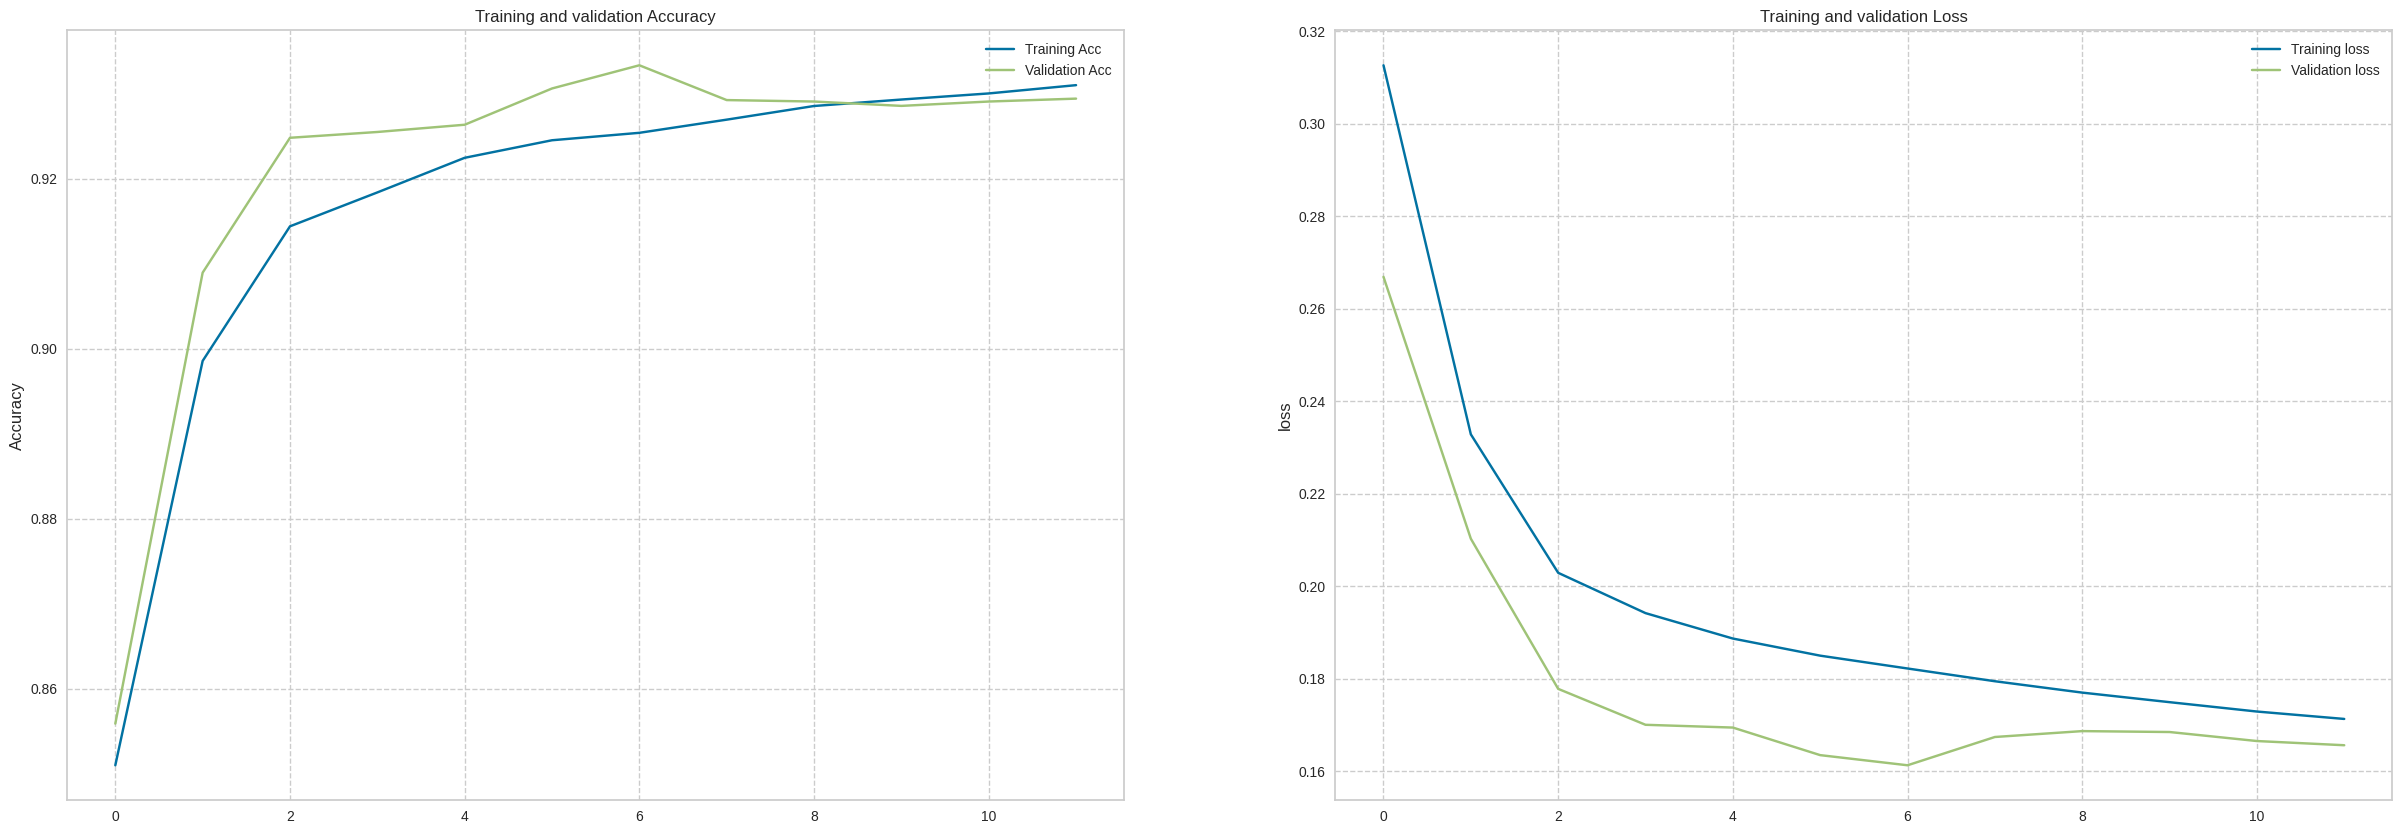

In [85]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_func_tuned_df['Accuracy'], label='Training Acc')
plt.plot(history_func_tuned_df['val_Accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_func_tuned_df['loss'], label='Training loss')
plt.plot(history_func_tuned_df['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [86]:
y_pred_func_tuned = model_func_tune.predict(X_test)
y_pred_func_tuned = np.where(y_pred_func_tuned >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_tuned))

230/230 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3364
           1       0.93      0.92      0.93      3966

    accuracy                           0.92      7330
   macro avg       0.92      0.92      0.92      7330
weighted avg       0.92      0.92      0.92      7330



Text(95.72222222222221, 0.5, 'True Label')

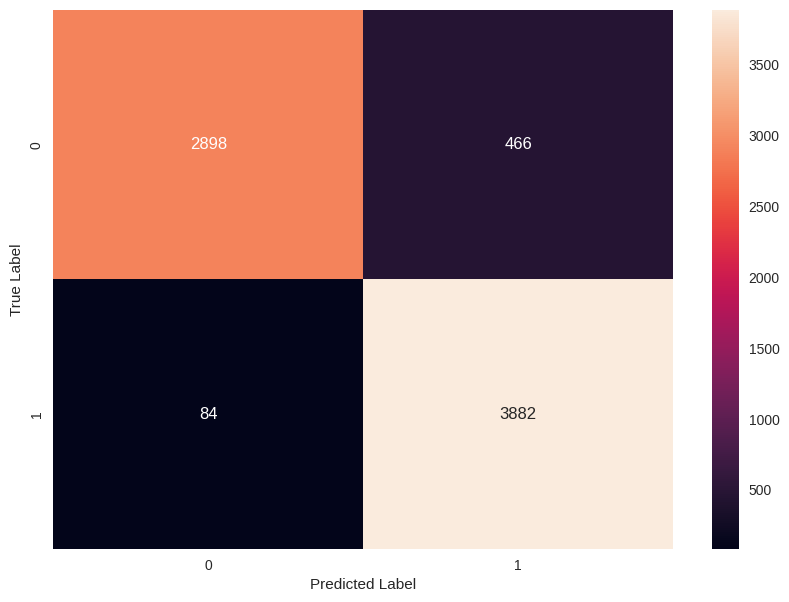

In [111]:
cm_func = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_tuned)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

> Data diatas merupakan hasil evaluasi dari funtional API Evaluation sebelum tuning. yang mana dalam nilai loss dan accuracy cukup baik dan dapat dikataan good fit karena jarakanya yang cukup kecil train dan val.

> Pada kali ini akan fokus pada f1-score karena baik churn atau no churn merupakan data yang penting dan tidak bisa dipilih harus fokus pada FN atau FP

`nilai f1 score 0.92-> 0`
`nilai f1 score 0.93-> 1`

Rata-rata dari recall dan precision

### **Funtional API vs Funtional API Tuning:**

>Perbedaan antara model funtional API sebelum dan sesudah dituning berada pada waktu training nya dimana model sequential sebelum dilakukan training membutuhkan waktu sekitar 2 menit sedangkan setelah dituning hanya membutuhkan waktu 1 menit, sehingga setelah dituning, proses trainingnya jadi lebih cepat. 

>untuk  nilai F1 score dari keduanya secara overall lebih baik setelah tuning karena saat target 0 dan 1 f1-score lebih besar dari sebelum tuning

---

# 💾 Model Saving

---

In [91]:
with open('/content/pipeline.pkl', 'wb') as file_1:
    joblib.dump(pipeline, file_1)

In [94]:
model_func_tune.save('/content/model.h5')

# Conclusion

- Pada kasus ini, yang paling menjadi perhatian adalah banyaknya feedback negative dari user entah karena kualitas produk yang buruk, websitenya yang buruk, kebanyakan iklan dan sebagainya sehingga hal-hal tersebut perlu dievaluasi kembali oleh perusahaan agar mengurangi tingkat churn dari user walaupun semakin tinggi level membership dari user sebenarnya tidak akan begitu mempengaruhi tingkat churn namun sebagai perusahaan sebaiknya terus melakukan improvement untuk menjaga kredibilitas.

- Untuk perbedaan dari model sequential sebelum dan sesudah dituning adalah dari segi waktu trainingnya dimana model setelah dituning bisa mendapatkan nilai akurasi yang sama dengan yang sebelum dilakukan tuning yaitu 0.93 tetapi dengan waktu training yang lebih cepat.

- Untuk perbedaan dari model functional api sebelum dan sesudah dituning adalah dari nilai akurasi dan kecepatan waktu trainingnya, sebelum dilakukan tuning didapatkan akurasi sebesar 0.89 dan kecepatan training 2 menit sedangkan setelah dituning, nilai akurasinya menjadi 0.93 dengan kecepatan training nya adalah 1 menit

- Pada kasus ini model yang terbaik dan yang digunakan adalah model Functional API (yang sudah dilakukan tuning) karena memiliki tingkat akurasi yang baik yaitu 0.93 dan waktu training yang lumayan cepat (1 menit) walaupun sebenarnya model sequential yang sudah dituning waktu trainingnya lebih cepat yaitu 56 detik namun terlihat pada grafik untuk data validasi terdapat exploding gradient sehingga menyebabkan pembelajaran menjadi tidak stabil dan tidak konvergen (exploding gradient mengacu pada masalah yang terjadi ketika nilai gradien yang dihitung pada layer-layer awal dari jaringan saraf dalam proses backpropagation menjadi sangat besar).